<hr style="height: 1px;">
<i>This notebook was authored by the 8.S50x Course Team, Copyright 2022 MIT All Rights Reserved.</i>
<hr style="height: 1px;">
<br>

<h1>Pset 3: Covariance and Correlation, Bayesian and Frequentist Statistics, and Higgs Search </h1>


<a name='section_3_0'></a>
<hr style="height: 1px;">


## <h2 style="border:1px; border-style:solid; padding: 0.25em; color: #FFFFFF; background-color: #90409C">P3.0 Overview</h2>


<h3>Navigation</h3>

<table style="width:100%">
    <tr>
        <td style="text-align: left; vertical-align: top; font-size: 10pt;"><a href="#section_3_1">P3.1 Multivariable Continuous Distributions and Covariance</a></td>
        <td style="text-align: left; vertical-align: top; font-size: 10pt;"><a href="#problems_3_1">P3.1 Problems</a></td>
    </tr>
    <tr>
        <td style="text-align: left; vertical-align: top; font-size: 10pt;"><a href="#section_3_2">P3.2 Worked Covariance Examples and Problems</a></td>
        <td style="text-align: left; vertical-align: top; font-size: 10pt;"><a href="#problems_3_2">P3.2 Problems</a></td>
    </tr>
    <tr>
        <td style="text-align: left; vertical-align: top; font-size: 10pt;"><a href="#section_3_3">P3.3 Correlation Coefficient</a></td>
        <td style="text-align: left; vertical-align: top; font-size: 10pt;"><a href="#problems_3_3">P3.3 Problems</a></td>
    </tr>
    <tr>
        <td style="text-align: left; vertical-align: top; font-size: 10pt;"><a href="#section_3_4">P3.4 Covariance Matrix and Computational Examples</a></td>
        <td style="text-align: left; vertical-align: top; font-size: 10pt;"><a href="#problems_3_4">P3.4 Problems</a></td>
    </tr>
     <tr>
        <td style="text-align: left; vertical-align: top; font-size: 10pt;"><a href="#section_3_5">P3.5 Bayesian and Frequentist Statistics</a></td>
        <td style="text-align: left; vertical-align: top; font-size: 10pt;"><a href="#problems_3_5">P3.5 Problems</a></td>
    </tr>
     <tr>
        <td style="text-align: left; vertical-align: top; font-size: 10pt;"><a href="#section_3_6">P3.6 Higgs Boson Search</a></td>
        <td style="text-align: left; vertical-align: top; font-size: 10pt;"><a href="#problems_3_6">P3.6 Problems</a></td>
    </tr>
     <tr>
        <td style="text-align: left; vertical-align: top; font-size: 10pt;"><a href="#section_3_7">P3.7 Machine Learning for the Higgs Boson Search</a></td>
        <td style="text-align: left; vertical-align: top; font-size: 10pt;"><a href="#problems_3_7">P3.7 Problems</a></td>
    </tr>   
</table>



<h3>Learning Objectives</h3>

In these problems we will explore the following objectives:

- Understand the derivation and conceptual basis for covariance and how to calculate it
- Estimate covariance values from given distributions of data
- Observe limitations of the covariance value and subsequently the derivation and use of the correlation coefficient
- Calculate the covariance matrix and how to use it to calculate covariance and correlation coefficients for multiple variables
-Understand the basis for Bayes' theorem
-Discuss how it fits into more general Bayesian statistics and its difference from frequentists' perspective
-Look at examples of applying Bayes' theorem
-Introduce ourselves to deep learning through a binary classification problem

<h3>Importing Data (Colab Only)</h3>

If you are in a Google Colab environment, run the cell below to import the data for this notebook. Otherwise, if you have downloaded the course repository, you do not have to run the cell below.

See the source and attribution information below:

>data: data/P07/DatasaurusDozen.tsv <br>
>source: https://damassets.autodesk.net/content/dam/autodesk/research/publications-assets/pdf/same-stats-different-graphs.pdf, http://www.thefunctionalart.com/2016/08/download-datasaurus-never-trust-summary.html <br>
>attribution data:  Alberto Cairo <br>
>attribution paper: Autodesk, Justin Matejka, George Fitzmaurice, CHI '17: Proceedings of the 2017 CHI Conference on Human Factors in Computing SystemsMay 2017 Pages 1290–1294https://doi.org/10.1145/3025453.3025912

In [ ]:
#>>>RUN: P3.0-runcell00

!git init
!git remote add -f origin https://github.com/mitx-8s50/nb_LEARNER/
!git config core.sparseCheckout true
!echo 'P07' >> .git/info/sparse-checkout
!git pull origin main

In [ ]:
#>>>RUN: P3.0-runcell01

!pip install lmfit
!pip install dcor

<h3>Importing Libraries</h3>

Before beginning, run the cell below to import the relevant libraries for this notebook.

In [2]:
#>>>RUN: P3.0-runcell02

import numpy as np               #https://numpy.org/doc/stable/
import matplotlib.pyplot as plt  #https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.html
import pandas as pd              #https://pandas.pydata.org/docs/user_guide/index.html
import lmfit

<h3>Setting Default Figure Parameters</h3>

The following code cell sets default values for figure parameters.

In [3]:
#>>>RUN: P3.0-runcell03

#set plot resolution
%config InlineBackend.figure_format = 'retina'

#set default figure parameters
plt.rcParams['figure.figsize'] = (9,6)

medium_size = 12
large_size = 15

plt.rc('font', size=medium_size)          # default text sizes
plt.rc('xtick', labelsize=medium_size)    # xtick labels
plt.rc('ytick', labelsize=medium_size)    # ytick labels
plt.rc('legend', fontsize=medium_size)    # legend
plt.rc('axes', titlesize=large_size)      # axes title
plt.rc('axes', labelsize=large_size)      # x and y labels
plt.rc('figure', titlesize=large_size)    # figure title


<a name='section_3_1'></a>
<hr style="height: 1px;">

## <h2 style="border:1px; border-style:solid; padding: 0.25em; color: #FFFFFF; background-color: #90409C">P3.1 Multivariable Continuous Distributions and Covariance</h2>    

| [Top](#section_3_0) | [Previous Section](#section_3_0) | [Problems](#problems_3_1) | [Next Section](#section_3_2) |


<h3>Overview</h3>

We can define a joint distribution function for two variables $x,y$ as $F(x,y)=P\{(x' \lt x)\cap (y' \lt y)\}$ that has the two properties:

- $F(\infty,\infty)=1$
- $F(-\infty,y)=F(x,-\infty)=0$
- $F$ is monotonically increasing.

This is useful but overshadowed by the much more useful probability density which we can define as $f(x,y)=\frac{\partial^2 F}{\partial x \partial y}$ which, by convention, is usually normalized, i.e. $\iint \text{d}x\text{d}y f(x,y)=1$. Given this multivariable distribution we can calculate its moments:


Means:

- $\mu_x = \langle x \rangle$

- $\mu_y = \langle y \rangle$

Variances:

- $\text{var}(x)=\sigma_x^2 = \langle (x-\mu_x)^2\rangle$
- $\text{var}(y)=\sigma_y^2 = \langle (y-\mu_y)^2\rangle$
- $\text{var}(x,y)=\sigma_{x,y}=\langle(x-\mu_x)(y-\mu_y)\rangle=\langle{xy}\rangle-\langle{x}\rangle\langle{y}\rangle$

The first few terms are nothing new that we haven't seen from single variable distributions, but here we introduce the new 'mixed variance' term combining the variance of $x$ and $y$. This value is called the $\mathrm{covariance}$ and is often written as $\mathrm{cov}(x,y)$.

<a name='problems_3_1'></a>     

| [Top](#section_3_0) | [Restart Section](#section_3_1) | [Next Section](#section_3_2) |


### <span style="border:3px; border-style:solid; padding: 0.15em; border-color: #90409C; color: #90409C;">Problem 3.1.1</span>

Write a python function that takes in an array of single variable data and outputs its variance. Do not use any `numpy` functions, instead consider `sum()` and `len()` to perform operations on arrays.


In [ ]:
#>>>PROBLEM: P3.1.1
# Use this cell for drafting your solution (if desired),
# then enter your solution in the interactive problem online to be graded.


def get_variance(x):

    ################################
    ####### INSERT CODE HERE #######
    ################################

    return x_variance


#TEST
sigma=2
x = np.random.normal(0,sigma,100000)

print("calculated:",get_variance(x),"expected:",sigma**2)

#Alternatively
print("Quick Variance:",x.var())

### <span style="border:3px; border-style:solid; padding: 0.15em; border-color: #90409C; color: #90409C;">Problem 3.1.2</span>

Write a python function that takes in 2 arrays of data and outputs their covariance. Specifically, use the definition $\sigma_{x,y}=\langle{xy}\rangle-\langle{x}\rangle\langle{y}\rangle$. Again, do not use any `numpy` functions in your solution.

Is your result different from implementing the definition $\sigma_{x,y}=\langle(x-\mu_x)(y-\mu_y)\rangle$? 

What about the `numpy` function `np.cov[x,y]`? For more information about the `numpy` comparison, see <a href="https://stackoverflow.com/questions/48881499/why-is-numpys-covariance-slightly-different-to-manually-computing" target="_blank">here</a> and <a href="https://numpy.org/doc/stable/reference/generated/numpy.cov.html" target="_blank">here</a>.



In [ ]:
#>>>PROBLEM: P3.1.2
# Use this cell for drafting your solution (if desired),
# then enter your solution in the interactive problem online to be graded.

def get_covariance(x,y):

    ################################
    ####### INSERT CODE HERE #######
    ################################
    
    return xy_variance

<a name='section_3_2'></a>
<hr style="height: 1px;">

## <h2 style="border:1px; border-style:solid; padding: 0.25em; color: #FFFFFF; background-color: #90409C">P3.2 Worked Covariance Examples and Problems</h2>    

| [Top](#section_3_0) | [Previous Section](#section_3_1) | [Problems](#problems_3_2) | [Next Section](#section_3_3) |


<h3>Examples of Covariance</h3>

We can take a look at some distributions to get a better intuition for what the covariance represents:

<p align="center">
<img alt="different scatter plots 1" src="https://raw.githubusercontent.com/mitx-8s50/images/main/P07/Figure_1.png" width="800"/>
</p>

We can see that Plots 1 and 3 have very clear linear relationships between $x$ and $y$ resulting in large covariance values. We also notice that the sign of the covariance matches the sign of the slope of the linear relationship. The way cases like these are typically described is that the two variables are "highly correlated". Note that this is exactly the opposite of what we earlier called "independent variables". 

By contrast, Plot 2 has a covariance value that is approximately zero since there isn't any distinguishable relationship between $x$ and $y$ for the data given. This is the case for independent variables, as these two variables are described as "uncorrelated".

So, the covariance is a quantitative measure of how close two variables are to being independent.<br>

<a name='problems_3_2'></a>     

| [Top](#section_3_0) | [Restart Section](#section_3_2) | [Next Section](#section_3_3) |


### <span style="border:3px; border-style:solid; padding: 0.15em; border-color: #90409C; color: #90409C;">Problem 3.2.1</span>

Using this, let's try to rank the covariance values for the following distributions:

<p align="center">
<img alt="different scatter plots 2" src="https://raw.githubusercontent.com/mitx-8s50/images/main/P07/Figure_2.png" width="700"/>
</p>

Which of the following is the correct ordering of the value of $\mathrm{cov}(x,y)$ in the plots above (from lowest to highest)? Consider the covariances as signed quantities, where negative values are considered lower than positive ones.


- $A \lt B \lt C \lt D$

- $B \lt A \lt D \lt C$

- $D \lt A \lt B \lt C$

- $D \lt B \lt C \lt A$

- $D \lt C \lt B \lt A$

- $A \approx B \lt C \approx D$

- $C \approx D \lt A \approx B$

>#### Follow-up 3.2.1a (ungraded)
>
>As you have seen, the ranking of covariances from lowest to highest is not necessarily the same as the ranking of the correlation from weakest to strongest. Instead, the ranking from weakest to strongest is based on the absolute value of the covariance. However, absolute values often prove difficult in some analyses due to their lack of differentiability around 0. To address this, the square of the covariance is typically used.
>
>Rank the same 4 plots in terms of the square of their covariances.

<a name='section_3_3'></a>
<hr style="height: 1px;">

## <h2 style="border:1px; border-style:solid; padding: 0.25em; color: #FFFFFF; background-color: #90409C">P3.3 Correlation Coefficient</h2>    

| [Top](#section_3_0) | [Previous Section](#section_3_2) | [Problems](#problems_3_3) | [Next Section](#section_3_4) |


<h3>Overview</h3>

While covariance is an important quantity in data analysis, it's difficult to determine the degree of correlation or to make comparisons between different sets of data using only the covariance. The most important reason why using covariance alone is problematic is that its value is not bounded.  As the range of $x$ and/or $y$ expands, $\sigma_{x,y}$ increases without limitation as demonstrated in the code below. The second case, for which the two variables are almost uncorrelated, has a covariance which is almost a factor of 4 higher simply because it has a broader extent.

In [ ]:
#>>>RUN: P3.3-runcell01

plt.rcParams['figure.figsize'] = (6,4)

np.random.seed(90)

sigma1=1
x1 = np.random.normal(0,sigma1,10000)

sigma2=0.01
np.random.seed(908)
shift1 = np.random.normal(0,sigma2,10000)
y1 = x1 + shift1


plt.scatter(x1,y1)
plt.title("High correlation, smaller extent")
print("Two variables strongly correlated and with smaller extent: cov(x,y) = ",np.cov([x1,y1],bias=True)[0,1])
plt.show()

sigma3=5.5
np.random.seed(91)
x2 = np.random.normal(0,sigma3,10000)

sigma4=40
np.random.seed(909)
shift2 = np.random.normal(0,sigma4,10000)
y2 = 0.13*(x2 + shift2)

plt.scatter(x2,y2)
plt.title("Low correlation, larger extent")
print("Two variables weakly correlated and with larger extent: cov(x,y) = ",np.cov([x2,y2],bias=True)[0,1])
plt.show()

#reset default figure size
plt.rcParams['figure.figsize'] = (9,6)

In order to address this deficiency in $\sigma_{x,y}$, we introduce the ***correlation coefficient*** which is defined as follows:

$$\rho_{x,y}\equiv \sigma_{x,y}/\sigma_x\sigma_y$$

Note that this quantity also has the advantage that it is dimensionless, so one could even compare datasets which measure different observables.

By the Cauchy-Schwarz inequality and the 'geometric' relationship between $\sigma_{x,y}$ and $\sigma_x,\sigma_y$, we have that $|\rho_{x,y}|\leq 1$. This $\rho_{x,y}$ is known as Pearson's correlation coefficient and measures the degree to which the two variables are correlated.

Similarly to the covariance values, $\rho$ will take both positive and negative values depending on the sign of the slope, with $\rho=\pm 1$ indicating a perfect correlation between $x$ and $y$ and $\rho=0$ occurring for independent variables which have no correlation at all. We can see this with some examples:

<p align="center">
<img alt="different scatter plots 3" src="https://raw.githubusercontent.com/mitx-8s50/images/main/P07/Figure_3.png" width="900"/>
</p>

Note, in particular, the three examples with $\rho\approx +0.8$ and $\rho \approx -0.7$ to $-0.8$. These clearly demonstrate that the correlation coefficient measures only how close to linear the relationship is, and is not affected by the slope of that linear dependence. 

<a name='problems_3_3'></a>     

| [Top](#section_3_0) | [Restart Section](#section_3_3) | [Next Section](#section_3_4) |


### <span style="border:3px; border-style:solid; padding: 0.15em; border-color: #90409C; color: #90409C;">Problem 3.3.1</span>

Write a python function which takes in two sets of data and calculates the correlation coefficient between them. You may use previous functions you've calculated, `get_variance(x)` and `get_covariance(x,y)`, but do not use any other outside functions. Do not use `numpy`.

In [ ]:
#>>>PROBLEM: P3.3.1
# Use this cell for drafting your solution (if desired),
# then enter your solution in the interactive problem online to be graded.

np.random.seed(859303)

x = np.linspace(0, 10, 100)
y = [xi + np.random.normal(0,2,1)[0] for xi in x]

plt.scatter(x,y)

def get_correlation_coeff(x,y):
    # INSERT CODE HERE
    return


print("correlation coefficient version 1:",get_correlation_coeff(x,y))

<h3>How Data Uncertainties Affect the Correlation Coefficient</h3>

One interesting question is how uncertainty in the dependent variable impacts the correlation coefficient. We can investigate this quantitatively by plotting the correlation coefficient between two quantities versus the standard deviation of the dependent variable. 

This can be done in many ways, but here are some suggestions for how to proceed:

- Begin by creating a `np.linspace` for your $x$ variable, containing 1000 evenly spaced points from 0 to 10.

- Then, create a `np.linspace` of standard deviations `std`, ranging from 0 to 150 and containing 150 points. In the next step, we will sample from Gaussians with a mean of zero and standard deviations given by the values in this range. These random "uncertainties" will be used to "smear out" the $y$ values found using the exact functional form. 

- Now, for the full array of $x$ values and each individual `std` value in your array, calculate the correlation coefficient between the values of $x$ and the smeared values $y(std)$. Each element of the array $y(std)$ should be related to $x$ by the following: $y_{i} = x_{i} + unc_{i}$, where $unc_{i}$ is a random uncertainty drawn from a normal distribution with a mean of 0 and a standard deviation of `std`.

- Iterate the previous step over the full range of standard deviations and plot this as `(std_dev, correlation_coefficient_given_std_dev)`.

### <span style="border:3px; border-style:solid; padding: 0.15em; border-color: #90409C; color: #90409C;">Problem 3.3.2</span>

Complete the task outlined above to make a plot of `correlation_coefficient_given_std_dev` vs. `std_dev`. You may consider using the starting code below (and you may use `numpy`.) 

What is the general shape of the graph?

- Steadily increasing

- Steadily decreasing

- Initially quickly decreasing, then flattening out

- Initially quickly increasing, then flattening out

- Flat at the beginning, then quickly increasing

- Flat at the beginning, then quickly decreasing


In [ ]:
#>>>PROBLEM: P3.3.2
# Use this cell for drafting your solution (if desired),
# then enter your solution in the interactive problem online to be graded.

np.random.seed(859303) 

std_devs = #YOUR CODE HERE
x = #YOUR CODE HERE
    
correlation_coefficient_given_std_dev = []
for std_dev in std_devs:
    #YOUR CODE HERE
    
plt.plot(std_devs, correlation_coefficient_given_std_dev)
plt.xlabel("Y  standard deviation")
plt.ylabel("Correlation coefficient")
plt.axhline(0,0,150)
plt.show()

>#### Follow-up 3.3.2a (ungraded)
> 
>The plot for Problem 3.3.2 shows that value of the correlation coefficient starts to fluctuate up and down quite a bit as the uncertainty in $y$ (Y standard deviation) gets larger. Why is this? How could you modify the code to make the correlation coefficient change more smoothly?

<h3> Correlation Coefficients for Non-linear Functional Forms</h3>

In all of the examples shown above, $y$ fluctuates around a linear dependence on $x$ with a slope of unity, in other words $y=x+unc$ where $unc$ is some fluctuation or experimental uncertainty which causes $y$ to deviate from a perfect linear dependence on $x$. Small and large spreads of $unc$ correspond to large and small values of the correlation coefficient, respectively. 

Alternatively, if $y(x)$ has a different (i.e. non-linear) functional form, it is still true that large values of $\sigma_{x,y}$ will be found if there are small fluctuations around the exact functional form $y=f(x)$. However, the limit of $\sigma_{x,y}=1$ for a perfect correlation (i.e. $y=f(x)+unc$ where $unc \approx 0$) no longer holds.

This is demonstrated by the code shown below which calculates $\sigma_{x,y}$ for three different functions. Try running with different values of `ysigma` (including a very small number) to see how the plots and the correlation coefficients change.

We'll explore the relationship between the fluctuations and the correlation coefficients in more detail in Problem 3.3.3.

In [ ]:
#>>>RUN: P3.3-runcell02

plt.rcParams['figure.figsize'] = (6,4)

np.random.seed(859303)

# Vary ysigma from small to large values and see how the results change
ysigma = 10

x1 = np.random.uniform(0, 500, 1000)
shift1 = np.random.normal(0,ysigma,1000)

y1 = np.sqrt(x1)+shift1

print("cov(x,y) for sigma(y) = ",ysigma,"is: ",get_correlation_coeff(x1,y1))
plt.title("y=sqrt(x)")
plt.scatter(x1,y1)
plt.show()

x2 = np.random.uniform(0, 4.5, 1000)
shift2 = np.random.normal(0,ysigma,1000)
y2 = x2*x2 + shift2

print("cov(x,y) for sigma(y) = ",ysigma,"is: ",get_correlation_coeff(x2,y2))
plt.title("y=x*x")
plt.scatter(x2,y2)
plt.show()

x3 = np.random.uniform(0, 20, 1000)
shift3 = np.random.normal(0,ysigma,1000)
y3 = x3 + shift3

print("cov(x,y) for sigma(y) = ",ysigma,"is: ",get_correlation_coeff(x3,y3))
plt.title("y=x")
plt.scatter(x3,y3)
plt.show()

#reset default figure size
plt.rcParams['figure.figsize'] = (9,6)

### <span style="border:3px; border-style:solid; padding: 0.15em; border-color: #90409C; color: #90409C;">Problem 3.3.3</span>

We've studied the dependence of the correlation coefficient on the standard deviation for the equation `y(std) = x + unc`, where `unc` is an array of random uncertainties drawn from a normal distribution with mean 0 and the given standard deviation. We've also shown above that there are differences in the correlation coefficient for different functional forms. Let's now look at this issue in more detail.


Specifically, how does the graph of `correlation_coefficient_given_std_dev` vs. `std` change with different functional forms such as `y(std) = 2x + unc` and `y(std) = x^2 + unc` when `1 < |x|`?


For a given `std`, the correlation coefficient between `y` and `x` (compared to the case where `y(std) = x + unc`):

- is larger for both `y=2x + err` and `y=x^2 + err`.
- is smaller for both `y=2x + err` and `y=x^2 + err`.
- is larger for `y=2x + err` and smaller for `y=x^2 + err`.
- is smaller for `y=2x + err` and larger for `y=x^2 + err`.
- is the same for both 'y=2x + err' and 'y=x^2 + err'.
- the answer is different for different values of `std`.


<a name='section_3_4'></a>
<hr style="height: 1px;">

## <h2 style="border:1px; border-style:solid; padding: 0.25em; color: #FFFFFF; background-color: #90409C">P3.4 Covariance Matrix and Computational Examples</h2>   

| [Top](#section_3_0) | [Previous Section](#section_3_3) | [Problems](#problems_3_4) | [Next Section](#section_3_5) |


<h3>Overview</h3>

In the previous sections where we've studied explicitly calculating the variance, covariance, and correlation coefficient, we've also pointed out that these quantities can be found directly using functions in the numpy library. 

In fact, you've seen the use of two functions, specifically `np.cov([x,y])[0,1]` and `np.corrcoef([x,y])[0,1]`, which calculate the covariance and correlation coefficient, respectively, between two datasets $x$ and $y$. The `[0,1]` indicates that these functions actually return matrices, for which we've only seen one element. Let's look at the values of the other elements of each matrix using one of the datafiles that were downloaded at the start of this notebook.


In [ ]:
#>>>RUN: P3.4-runcell01

import numpy as np 
import matplotlib.pyplot as plt

pts = np.genfromtxt('data/P07/slope_2.txt', delimiter=',') #read in example file, 
# play around with different example files, view the different file names in `data/P07`

x = [n[0] for n in pts]    # get x values
y = [n[1] for n in pts]    # get y values

plt.scatter(x,y,s=5) #Plot the points from our example file
plt.xlabel('x')
plt.ylabel('y')
plt.show()

print('covariance matrix:')
print(np.cov(x,y)) #Print out covariance of x,y

print('correlation coefficient matrix:')
print(np.corrcoef(x,y)) #Print out covariance of x,y

Since the second matrix can be calculated from the elements of the first one, we'll concentrate our discussion on the first one, the so-called "covariance matrix".

For a set of $N$ datasets, $x_1,x_2,...,x_N$, the covariance matrix is an $N\times N$ matrix where the diagonal entries are the variance or $\sigma^2$ of the corresponding dataset, i.e. $M_{ii}=\text{var}(x_i)=\sigma_i^2$. Additionally, the off-diagonal values contain the covariance of two datasets, so $M_{ij}=\sigma_{i,j}$. The covariance $\sigma_{i,j}$ is always equivalent to $\sigma_{j,i}$ so $M$ is a symmetric matrix. Shown visually we have for $3$ datasets $x,y$, and $z$:

<br>

$$
M=\begin{pmatrix} \sigma_x^2 & \sigma_{x,y} & \sigma_{x,z}\\ 
\sigma_{y,x} & \sigma_{y}^2 & \sigma_{y,z}\\ \sigma_{z,x} & \sigma_{z,y} & \sigma_{z}^2 \end{pmatrix}
$$

<br>

For more than two datasets, the numpy syntax changes slightly, namely replacing the two arguments in parentheses seen above with three or more arguments in square brackets:

In [ ]:
#>>>RUN: P3.4-runcell02

np.random.seed(859303)

#Generating our three datasets
x = np.random.random(100)
y = np.arange(100)+np.random.uniform(-2,2,size=(100,))
delta = np.random.uniform(-1,1,size=(100,))
z = .5*y+delta

#Plotting our data
ax = plt.axes(projection='3d')
ax.scatter3D(x,y,z)
plt.xlabel('x')
plt.ylabel('y')
plt.show()

#Getting our covariance matrix, notice how we need a list for 3 datasets here instead of just two arguments
M = np.cov([x,y,z])
print('covariance matrix:')
print(M)

#Getting our correlation coefficient matrix, notice how we need a list for 3 datasets here instead of just two arguments
M = np.corrcoef([x,y,z])
print('correlation coeff matrix:')
print(M)

Visually, the 3D data display shown above doesn't appear to show any strong relationships between $x,y,$ and $z$. However, by examining the covariance matrix, we can see a large covariance value (~425) for $\sigma_{y,z}=\sigma_{z,y}$, suggesting that they are likely correlated. One needs to be cautious since both $y$ and $z$ have a very large extent which, as we've seen, can lead to a larger covariance. As shown in the second printout, $\rho_{y,z}$ has a value of $0.999$, meaning these two datasets are, in fact, very strongly correlated! The correlation coefficients between $x$ and both $y$ and $z$ are much smaller.

These relationships are much clearer in the individual 2D plots shown by the code below:


In [ ]:
#>>>RUN: P3.4-runcell03

plt.rcParams['figure.figsize'] = (6,4)

#Plotting our data
plt.scatter(x,y,s=2)
plt.xlabel('x')
plt.ylabel('y')
plt.show()

#Plotting our data
plt.scatter(x,z,s=2)
plt.xlabel('x')
plt.ylabel('z')
plt.show()

#Plotting our data
plt.scatter(y,z,s=2)
plt.xlabel('y')
plt.ylabel('z')
plt.show()

#reset default figure size
plt.rcParams['figure.figsize'] = (9,6)

Something to think about: If $y$ and $z$ are strongly correlated, could $x$ have a large correlation coefficient with one of those variables, but not with both?

Using what we've learned about the covariance matrix and the correlation coefficient, let's use them to calculate some of the other quantities we've discussed:

<a name='problems_3_4'></a>   

| [Top](#section_3_0) | [Restart Section](#section_3_4) | [Next Section](#section_3_5) |

### <span style="border:3px; border-style:solid; padding: 0.15em; border-color: #90409C; color: #90409C;">Problem 3.4.1</span>

Given a covariance matrix $M$ with $N$ datasets, $x_0,x_1,...,x_{N-1}$ , create three functions to find the following:

* The function `std_i` which returns the standard deviation of dataset $i$
* The function `cov_ij` which returns covariance of datasets $x_i$ and $x_j$, i.e. $\sigma_{i,j}$
* The function `corr_ij` which returns the correlation coefficient of datasets $x_i$ and $x_j$, i.e. $\rho_{i,j}$

Design your functions such that they take in 2-3 parameters, those being the covariance matrix $M$ and the indices requested (one index for `std_i` and 2 for `cov_ij` and `corr_ij`).

In [ ]:
#>>>PROBLEM: P3.4.1
# Use this cell for drafting your solution (if desired),
# then enter your solution in the interactive problem online to be graded.

def std_i(M, i):
  #INSERT CODE HERE

def cov_ij(M, i, j):
  #INSERT CODE HERE

def corr_ij(M, i, j):
  #INSERT CODE HERE

np.random.seed(7)
array_size = 100
x = np.random.random(array_size)
y = np.arange(array_size)+np.random.uniform(-2,2,size=(array_size,))
delta = np.random.uniform(-1,1,size=(array_size,))
z = .5*y+delta

M = np.cov([x,y,z])

print('stdev_i for i=[0,1,2]:',std_i(M, 0), std_i(M, 1), std_i(M, 2))
print('cov_ij for ij=[[0,2],[1,2]]:',cov_ij(M, 0, 2), cov_ij(M, 1, 2))
print('corr_ij for ij=[[0,2],[1,2]]:',corr_ij(M, 0, 2), corr_ij(M, 1, 2))


### <span style="border:3px; border-style:solid; padding: 0.15em; border-color: #90409C; color: #90409C;">Problem 3.4.2</span>

In the code shown below, you are given 5 variables, $v$, $w$, $x$, $y$, and $z$. You might be tempted to think of them as four independent variables and one dependent one: $z=f(v,w,x,y)$. However, in reality, $v$, $w$ ,$x$, and $y$ are all interdependent on each other as well. Using the covariance matrix and the three functions you defined in the previous problem, rank the variables $v$, $w$, $x$, and $y$ in order of least to most strongly correlated with $z$.

Enter your answer as a list of the **lowercase** variable names $v$, $w$, $x$, and $y$ in single quotes, for example `['v1', 'v2', 'v3', 'v4']`, where `v1` is the most weakly correlated with $z$ and `v4` is the most strongly correlated.

In [ ]:
#>>>PROBLEM: P3.4.2
# Use this cell for drafting your solution (if desired),
# then enter your solution in the interactive problem online to be graded.

np.random.seed(859303)

v = np.random.random(100)
w = np.arange(100)+np.random.uniform(-2,2,size=(100,))
x = (np.random.random(100) + v)/2
y = (np.arange(100)+np.random.uniform(-2,2,size=(100,)))/(w+x+2)
delta = np.random.uniform(-1,1,size=(100,))
z = .5*y+delta + .05* w

################################
####### INSERT CODE HERE #######
################################


>#### Follow-up 3.4.2a (ungraded)
>
>At this point in the course, we have derived a small set of parameters which tell us a lot of information about the distributions we are looking at. However, our visual intuition often gives us more insights than just the statistical parameters of a dataset (or datasets). Therefore, we continue to strive for more sophisticated algorithms to help understand various aspects of datasets.
>
>To showcase how little we should rely solely on statistical parameters, Alberto Cairo created the Datasaurus dataset. The full paper can be found <a href="https://damassets.autodesk.net/content/dam/autodesk/research/publications-assets/pdf/same-stats-different-graphs.pdf" target="_blank">here</a> and the data are found <a href=" http://www.thefunctionalart.com/2016/08/download-datasaurus-never-trust-summary.html" target="_blank">here</a>, but below you can find a quick implementation (which relies on the function you have written previously) of how very different images can have surprisingly similar statistical parameters.
>
>Run the code below and compare the 5 statistical quantities (including the correlation coefficient) for the various wildly different-looking distributions.

In [ ]:
#>>>RUN: P3.4.2a

data = pd.read_csv('data/P07/DatasaurusDozen.tsv', sep='\t')

data_dictionary = {}
for image_name in data['dataset'].unique():
    x = np.array(data[data.dataset==image_name]['x'])
    y = np.array(data[data.dataset==image_name]['y'])
    plt.scatter(x, y)
    plt.show()
    print("x mean: ", np.mean(x))
    print("y mean: ", np.mean(y))
    print("x variance: ", get_variance(x))
    print("y variance: ", get_variance(y))
    print("Correlation coefficient: ", get_correlation_coeff(x,y))

### <span style="border:3px; border-style:solid; padding: 0.15em; border-color: #90409C; color: #90409C;">Problem 3.4.3</span>

Recently there has been a lot of interest in improving the notion of correlation. A new Metric has been developed called Distance Correlation. The aim of distance correlation is to capture correlation in datasets when linear correlations are not present, but there is clearly a correlation. 

The strategy with distance correlation is to replace the actual values of $x$ and $y$ in our pdf with distances of pairs within a dataset $X$ and a dataset $Y$. We can also write this as

$$
a_{j,k} = ||X_{j}-X_{k}|| \forall j,k\in1...n\\
b_{j,k} = ||Y_{j}-X_{k}|| \forall j,k\in1...n
$$

where $a_{j,k}$ and $b_{j,k}$ are just the euclidean distances ($||$) of the $j$-th and $k$-th elements in the dataset.  After this, we define something called the double-centered distance. For this we need to define the j-th mean distance given by 

$$
\bar{a}_{j\cdot} = \frac{1}{N}\sum_{k=1}^{n} a_{j,k}
$$

This defines a double centered distance given by the form below

$$
||A_{j,k}|| = a_{j,k}-\bar{a}_{j\cdot}-\bar{a}_{\cdot k}+\bar{a}_{\cdot\cdot}\\
||B_{j,k}|| = b_{j,k}-\bar{b}_{j\cdot}-\bar{b}_{\cdot k}+\bar{b}_{\cdot\cdot}
$$

Where $\bar{a}_{\cdot\cdot}$ is the average over all distances. Double centering achieves the goal of building a distribution of the distances about the mean distance. Finally the correlation is computed by summing over all distances. 

$$
dCov(x,y) = \frac{1}{n^2}\sum_{i=1}^{n}\sum_{k=1}^{n} A_{j,k}B_{j,k}
$$

Here are more details on this <a href="https://towardsdatascience.com/introducing-distance-correlation-a-superior-correlation-metric-d569dc8900c7" target="_blank">blog</a> and <a href="https://en.wikipedia.org/wiki/Distance_correlation" target="_blank">wiki</a>.

The distance covariance and correlation are conviently implemented for you in python using the dcor package. Compute distance correlation for the above dataset and compare these values to the standard correlation coefficient in each case.
    
Enter your answer as a list of numbers with preceision 1e-2, one for each image (13 total), where each number is the ratio `standar correlation coeff/distance correlation coefficient`. 

In [ ]:
#>>>PROBLEM: P3.4.3

import dcor

data = pd.read_csv('data/P07/DatasaurusDozen.tsv', sep='\t')

for image_name in data['dataset'].unique():
    x = np.array(data[data.dataset==image_name]['x'])
    y = np.array(data[data.dataset==image_name]['y'])
    plt.scatter(x, y)
    plt.show()
    print("x mean: ", np.mean(x))
    print("y mean: ", np.mean(y))
    print("x variance: ", get_variance(x))
    print("y variance: ", get_variance(y))
    print("Correlation coefficient: ", get_correlation_coeff(x,y))
    print("Distance correlation:",dcor.distance_correlation(x,y))
    
#ADD ADDITIONAL CODE IF NEEDED

<a name='section_3_5'></a>
<hr style="height: 1px;">

## <h2 style="border:1px; border-style:solid; padding: 0.25em; color: #FFFFFF; background-color: #90409C">P3.5 Bayesian and Frequentist Statistics</h2>   

| [Top](#section_3_0) | [Previous Section](#section_3_4) | [Problems](#problems_3_5) | [Next Section](#section_3_6) |


<!--start-block-->


<!-- ## 8.0 Bayes' Theorem -->
<h3> Bayes' Theorem </h3>

Bayes' Theorem is defined as the following and contains a few working parts to discuss:<br><br>
\begin{equation}
P(A|B)=\frac{P(A) \cdot P(B|A)}{P(B)}
\end{equation}


* $P(A|B)$, the probability of $A$ happening if $B$ is true, known as the "posterior" probability
* $P(A)$, the probability of $B$ happening, known as the "prior" probability of $A$
* $P(B|A)$, the probability of $B$ happening if $A$ is true, also known as the likelihood
* $P(B)$, probability of whether $B$ would have happened regardless of $A$

<br><br>
Usually $P(B)$ is just treated as a normalizing factor, and since we need other hypothesis for comparison in order to measure $P(B)$, this is often ommited from the expression and we often just quote:
\begin{equation*}
P(A|B)\propto P(A)\cdot P(B|A)
\end{equation*}

Often outside of the more general events $A$ and $B$ in this course we will more often use
\begin{equation*}
P(M|D)\propto P(M)\cdot P(D|M)
\end{equation*}
Where $D$ is the data in question and $M$ is the model we are attempting to apply to the observed data.

<h3>Frequentist vs. Bayesian Picture</h3>

Let's take an example from flipping a coin. We don't know if it's a fair coin (equal probability for heads or tails) or an unfair coin (unequal probability for heads vs tails). We'll refer to the probability for heads and tails respectively here as $P(H)$ and $P(T)$.<br><br>

After flipping the coin 20 times we obtain heads 15 times.

<h3>Frequentist Picture</h3>

For the frequentist, they will analyze the data by seeing that we have $P(H)=3/4$, therefore we must have an unfair coin!

<h3>Bayesian Picture</h3>

For the Bayesian statistician, they would be a little uncomfortable with this conclusion. Instead of stating that our parameter $p=P(H)$ is some fixed quantity that should be clear from our data, the Bayesian states that $p(H)$ is a random variable. <br><br>
In this case our parameter $p=P(H)$ corresponds to our prior $P(M)$. Since the Bayesian picture states that $p$ should be some random variable, let us assume a uniform prior $P(p)=P(M)=1$. Using Bayes' equation we now have:<br><br>
\begin{gather*}
P(p|D)\propto P(p)\cdot P(D|p)= \frac{N!}{m!(N-m)!}(1-p)^{N-m} p^{m}
\end{gather*}<br><br>
This follows from the fact that $P(D|p)$, the probability that we get heads $m$ out of $N$ times based on the probability $p$, should follow a binomial distribution. We can use this to plot out the probability distribution for $p$ for given values of $N$ and $m$ using python:

In [ ]:
#>>>RUN: P3.5-runcell01

import numpy as np
import matplotlib.pyplot as plt
from scipy.special import comb
from scipy.signal import peak_widths

def with_uniform_prior(p,N,m):
    return comb(N,m)*np.power(p,m)*np.power(1-p,N-m)

<a name='problems_3_5'></a>     

| [Top](#section_3_0) | [Restart Section](#section_3_5) | [Next Section](#section_3_6) |

### <span style="border:3px; border-style:solid; padding: 0.15em; border-color: #90409C; color: #90409C;">Problem 3.5.1</span>

Using the function above, plot out the probability distribution of $p$ for $N=20$ and $m=15$, in the range $p=[0,1]$. Use `np.argmax` to find the probability that maximizes the distribution, and report the result with precision 1e-2.

In [ ]:
#>>>PROBLEM: P3.5.1
# Use this cell for drafting your solution (if desired),
# then enter your solution in the interactive problem online to be graded.

N = 20
m = 15
p = np.arange(0,1,.0001)
posterior = with_uniform_prior(p,N,m)     # calculating P(p|D)
plt.plot(p,posterior)


best_p = ##YOUR CODE HERE     # getting the value of p where P(p|D) is maximized
plt.axvline(best_p,c='k')              # plotting the line at p where P(p|D) is maximized
plt.show()
print('Best p: ', round(best_p,3))

### <span style="border:3px; border-style:solid; padding: 0.15em; border-color: #90409C; color: #90409C;">Problem 3.5.2</span>

Plot the following probability distributions over the range $p=[0,1]$:

a) $N$=100, $m$=75\
b) $N$=4, $m$=3

How does distribution (a) compare to distribution (b)?

- Distribution (a) is maximized at a higher probability.

- Distribution (a) is more narrow and symmetric.

- The distribution shape does not depend on the number of iterations, $N$.

From the results of our exercises, we should be able to see that the amount of data we're working with greatly changes the distributions of our parameter $p$.

<h3>A New Prior</h3>

Let's change our prior assumptions and retackle this same coin flipping situation.<br><br>
Let's instead approach this with the assumption that it's very rare for a coin to be unfair and that we're 99% sure we're dealing with a normal coin. We can model this as a Gaussian with a mean at $p=0.5$ and $\sigma=0.01$.<br><br>

We now change our prior a bit to represent our new assumptions:
\begin{gather*}
P(p)=0.99\cdot \frac{1}{\sqrt{2\pi}\cdot 0.01}\exp\left(-\frac{1}{2}\frac{(p-0.5)^2}{(0.01)^2}\right)+0.01
\end{gather*}

As before we can plot out how this affects our distribution for $p$ with the following function:

In [ ]:
#>>>RUN: P3.5-runcell02

def with_new_prior(p,N,m):
    prior = 0.99 / (0.01 * np.sqrt(2*np.pi)) * np.exp(-(p-0.5)**2/(2*0.01**2))+0.01
    return prior*with_uniform_prior(p,N,m)

### <span style="border:3px; border-style:solid; padding: 0.15em; border-color: #90409C; color: #90409C;">Problem 3.5.3</span>

Using the new prior, again plot the distributions over the range for $p=[0,1]$ for the following values of $N$ and $m$:

a) $N=20$, $m=15$\
b) $N=4$, $m=3$\
c) $N=100$, $m=75$

For what probabilities are the three distributions with the new prior maximized now? Write your answer as a list of the values of maximum p, for $[N=20,\,m=15;\,N=4,\,m=3;\,N=100,\,m = 75]$ in that order, with a precision of 1e-3.

In [ ]:
#>>>PROBLEM: P3.5.3
# Use this cell for drafting your solution (if desired),
# then enter your solution in the interactive problem online to be graded.



From our results from this exercise we should see something surprising: for the exact same situation as before with heads 15 out of 20 flips our distributions now point much more to a fair coin just by changing our assumptions on the prior. We need much more data that contradicts our prior in order for our distribution to look more like an unfair coin. 

<!--start-block-->

<h3> Example applying Bayes' theorem </h3> 

In this section we will see two examples of applying Bayes' theorem. First a numerical example proving the nonintuitive results of the Monty Hall problem and then an intuitive problem using natural frequencies rather than equations to understand Bayes' theorem.

<!--start-block-->
<h4> Monty Hall game show problem</h4> 

We will implement a version of the Monty Hall game show problem where elements in a 1 x 3 array represent rooms, one of which will be the prize room. An array entry value of 0 represents an empty room. An array entry of 2 represents the prize room, which will be placed randomly within the array.

We perform this process N times, creating an N x 3 array called roomArr, where each row represents an iteration of the game.



In [ ]:
#>>>RUN: P3.5-runcell03

import numpy as np
import random

#iNits is the number of iterations
def get_roomArr(iNits):
  roomArr = np.zeros([iNits,3]) ##initialize the doors with nothing behind them
  random.seed(1)
  for i in range(iNits):
    prizeIndex = random.choice([0,1,2])
    roomArr[i][prizeIndex] = 2 ## randomly place the prize room among the three possible rooms in each iteration of the game
  return roomArr

Next we will randomly select a door to open in each iteration of the game. This will correspond to adding a 1 to a random entry within each row of array of rooms (roomArr). Each row in the room array will either have two entries that are 0 and one entry that is a 3, meaning we selected the correct room on our first try, or the row will have entries of 0, 1, and 2, meaning that we did not select the correct row on our first try.

In [ ]:
#>>>RUN: P3.5-runcell04

Nits = 1000 ## number of iterations

roomArr = get_roomArr(Nits)

for i in range(Nits):
  ourDoorIndex = random.choice([0,1,2])
  roomArr[i][ourDoorIndex] += 1

### <span style="border:3px; border-style:solid; padding: 0.15em; border-color: #90409C; color: #90409C;">Problem 3.5.4</span>

In what fraction of games do we guess the correct room? What fraction do we expect? Enter answers as a list of numbers `[numerical result, expectation]`, with precision 1e-3.

Before opening the door that we selected, the gameshow host opens the door to a different, empty room and asks if we would like to change the room we selected. The host knows which rooms are empty and which room has the prize, so they will only open a door that is empty. 

We know from above that 2/3 of the time, we will select the wrong door. In that scenario the host has only one empty room that they can open, since we selected the other empty room. After the host opens the other empty room, the game is left with two closed doors and the door that we did not choose will have the prize.

In the other 1/3 of games, when we select the prize room, the host can choose to open either empty room.

When the host opens an empty room, which was originally represented in the array as a 0, the array entry will become a -1.

In [ ]:
#>>>RUN: P3.5-runcell05

for i in range(Nits):
  hostDoorIndex = random.choice(np.where(roomArr[i]==0)[0]) ##randomly select an empty room to open
  roomArr[i][hostDoorIndex] = -1

Each gameshow iteration will either have the elements 1, 2, and -1, corresponding to us initially choosing an empty room, or 0, 3, and -1, corresponding to us initially choosing the prize room.

### <span style="border:3px; border-style:solid; padding: 0.15em; border-color: #90409C; color: #90409C;">Problem 3.5.5</span>

Similar to the previous problem, calculate the fraction of games where it is better to switch from your first door choice? Enter as a decimal with precision 1e-3.

<!--start-block-->


<h2> Conclusions </h2>

As we have seen, the conclusions from Bayesian perspectives all depend on your choice of prior when approaching the situation, i.e. whether we assumed that the coin was likely unfair or not.<br><br>

This isn't necessarily a bad thing, it allows us to build on our observations by applying things we know or suspect. There is the counter to this as we observed that if our prior significantly changes our answer then our data isn't very constrained by our model. <br><br>

Our exploration of the difference between the frequentist and Bayesian analysis should not leave you with the idea that one is much better or accurate than the other, both are powerful tools for data analysis that have different cases for optimal use.

<a name='section_3_6'></a>
<hr style="height: 1px;">

## <h2 style="border:1px; border-style:solid; padding: 0.25em; color: #FFFFFF; background-color: #90409C">P3.6 Higgs boson search</h2>   

| [Top](#section_3_0) | [Previous Section](#section_3_5) | [Problems](#problems_3_6) | [Next Section](#section_3_7) | 

If running in Colab, you must first disconnect and delete your previous runtime before starting this section. This will enable you to download the relevant data from a new directory.

In [ ]:
#>>>RUN: P3.6-runcell00

!git init
!git remote add -f origin https://github.com/mitx-8s50/nb_LEARNER/
!git config core.sparseCheckout true
!echo 'P09' >> .git/info/sparse-checkout
!git pull origin main

#NOTE: some files are too large to include the original repository, so you must download them here:
#https://www.dropbox.com/sh/wf7d42jg4mfbdlh/AAAXOXeEO9Bl_W6BUhV61kFpa?dl=0
#Upon downloading, place them in the appropriate directory, within  the folder MC

In [4]:
#>>>RUN: P3.6-runcell01

#NOTE: some files are too large to include the original repository, so you must download them here:
#https://www.dropbox.com/sh/wf7d42jg4mfbdlh/AAAXOXeEO9Bl_W6BUhV61kFpa?dl=0
#Upon downloading, this code will move them to the appropriate directory, within  the folder MC

!wget https://www.dropbox.com/sh/wf7d42jg4mfbdlh/AADnJ6f0zzYekvFunRpH13Gma/zzto2mu2e2011.csv?dl=0
!wget https://www.dropbox.com/sh/wf7d42jg4mfbdlh/AAAgZQdH4nWP9dYUmDLWXfhXa/zzto2mu2e2012.csv?dl=0
!wget https://www.dropbox.com/sh/wf7d42jg4mfbdlh/AADepq5NkiLgh0uaij8P9p1Ka/zzto4e2011.csv?dl=0
!wget https://www.dropbox.com/sh/wf7d42jg4mfbdlh/AAA4FHGuNlPcfXHgwCcqZAyva/zzto4e2012.csv?dl=0
!wget https://www.dropbox.com/sh/wf7d42jg4mfbdlh/AAAxiJAH_89oEYYvfMpFdtq4a/zzto4mu2011.csv?dl=0
!wget https://www.dropbox.com/sh/wf7d42jg4mfbdlh/AAD6lR-feTLWa1-GvYCsy8N5a/zzto4mu2012.csv?dl=0
!mv zzto2mu2e2011.csv?dl=0 data/P09/MC/zzto2mu2e2011.csv
!mv zzto2mu2e2012.csv?dl=0 data/P09/MC/zzto2mu2e2012.csv
!mv zzto4e2011.csv?dl=0 data/P09/MC/zzto4e2011.csv
!mv zzto4e2012.csv?dl=0 data/P09/MC/zzto4e2012.csv
!mv zzto4mu2011.csv?dl=0 data/P09/MC/zzto4mu2011.csv
!mv zzto4mu2012.csv?dl=0 data/P09/MC/zzto4mu2012.csv

zsh:1: no matches found: https://www.dropbox.com/sh/wf7d42jg4mfbdlh/AADnJ6f0zzYekvFunRpH13Gma/zzto2mu2e2011.csv?dl=0
zsh:1: no matches found: https://www.dropbox.com/sh/wf7d42jg4mfbdlh/AAAgZQdH4nWP9dYUmDLWXfhXa/zzto2mu2e2012.csv?dl=0
zsh:1: no matches found: https://www.dropbox.com/sh/wf7d42jg4mfbdlh/AADepq5NkiLgh0uaij8P9p1Ka/zzto4e2011.csv?dl=0
zsh:1: no matches found: https://www.dropbox.com/sh/wf7d42jg4mfbdlh/AAA4FHGuNlPcfXHgwCcqZAyva/zzto4e2012.csv?dl=0
zsh:1: no matches found: https://www.dropbox.com/sh/wf7d42jg4mfbdlh/AAAxiJAH_89oEYYvfMpFdtq4a/zzto4mu2011.csv?dl=0
zsh:1: no matches found: https://www.dropbox.com/sh/wf7d42jg4mfbdlh/AAD6lR-feTLWa1-GvYCsy8N5a/zzto4mu2012.csv?dl=0
zsh:1: no matches found: zzto2mu2e2011.csv?dl=0
zsh:1: no matches found: zzto2mu2e2012.csv?dl=0
zsh:1: no matches found: zzto4e2011.csv?dl=0
zsh:1: no matches found: zzto4e2012.csv?dl=0
zsh:1: no matches found: zzto4mu2011.csv?dl=0
zsh:1: no matches found: zzto4mu2012.csv?dl=0


In [ ]:
#>>>RUN: P3.6-runcell02

!pip install lmfit

In [5]:
#>>>RUN: P3.6-runcell03

import numpy as np
import pandas as pd
import math as mt
import scipy.optimize as opt
import scipy.stats as sta
import matplotlib.pyplot as plt
import csv

from scipy.optimize import curve_fit
import scipy
# from scipy.stats import norm
from scipy import stats
import lmfit
 

<h3> The Standard Model and the Higgs boson </h3>

The Standard Model (SM) describes the building blocks of our universe and successfully explains how they interact with each other. However, there are still unanswered questions that the SM cannot answer, like the mass of neutrinos and dark matter.
Among these unknowns, ten years ago, a foundational piece of the SM was still missing from our measurements - the Higgs boson. As one of the fundamental particles, it is the "mechanism that contributes to our understanding of the origin of mass of subatomic particles"[1]. Elementary particles acquire mass through their interaction with the Higgs field. It wasn't until 2012 that the Higgs boson discovery was announced by the ATLAS and CMS collaborations (on 4th July 2012). Evidence of a new particle with properties consistent with the SM-predicted Higgs boson was present in three decay modes $H \to ZZ^* \to 4ℓ$, $H \to \gamma\gamma$, and $H \to WW^* \to ℓ\nuℓ\nu$ in both experiments.

In this pset, you are going to reproduce the Nobel prize winning discovery in the so-called golden channel: $H \to ZZ^* \to 4ℓ$ using the LHC open data of RUN I (2009 – 2013, 7-8TeV). The aim of this problem is to understand the decay of the Higgs boson to four leptons, and make use of the properties of the decay products to perform a Higgs boson search.

If interested, one can dig more with key words:
- Standard Model
- Higgs Boson

[1] The Nobel Prize in Physics 2013

<h3> The Large Hadron Collider (LHC) and the CMS detector </h3>

The Large Hadron Collider (LHC) is the largest and highest-energy particle collider and the largest machine in the world. It lies in a 27km circular tunnel which is ~100m deep beneath the France–Switzerland border.

The LHC accelerates two beams of protons, in the opposite directions, to nearly the speed of light, and makes them collide. These collisions at super high energy produce large amounts of sub-atomic particles which allow physicists to probe the world of the infinitesmially small. The collisions happen at 4 points, where 4 detectors sit. The many layered CMS detector is one of them.

Different particles leave different "footprint" in CMS's layers, enabling identification of (nearly) all the stable particles produced in each collision. Measuring their momenta and energies and piecing together the information of all these particles, allows researchers to rebuild the whole collision. A figure of the specific particle interactions in a transverse slice of the detector, from the beam interaction region to the muon detector is shown below.

<p align="center">
<img alt="particle flow" src="https://raw.githubusercontent.com/mitx-8s50/images/main/P09/particle_flow.png" width="700"/>
</p>

More at
LHC: https://home.cern/science/accelerators/large-hadron-collider <br>
CMS Detector: https://cms.cern/detector

<h3> $H \to ZZ^* \to 4ℓ$ </h3>

The Higgs boson production cross section at the LHC is relatively small compared to those of other processes. In the dataset collected by the ATLAS and CMS experiments until June 2012 about 200,000 Higgs bosons with a mass of 125 GeV were expected, compared with the total number of proton-proton collisions recorded during that time $~10^{11}$. A sensitive channel for finding the Higgs boson is when it decays into four leptons, $H \to ZZ^* \to 4ℓ$ (ℓ = electron or muon [2]). The requirement of the presence of four leptons kills much of the background. For this reason, $H \to ZZ^* \to 4ℓ$ is referred to as “golden channel” of the Higgs boson decays. The Higgs boson invariant mass can be reconstructed with good precision and a sharp resonance of the Higgs boson can be searched for on top of the continuous backgrounds. Finding such a resonance constitutes a discovery of the Higgs boson.


The Feynman Diagram below shows the full chain of pp collision - Higgs boson production[3] - HtoZZto4L decay. And the figure here is a real event display in the CMS detector of $H \to ZZ^* \to 4ℓ$.


<p align="center">
<img alt="lepton Higgs decay" src="https://raw.githubusercontent.com/mitx-8s50/images/main/P09/4-lepton_Higgs_decay.svg" width="400"/>
<img alt="lepton Higgs decay" src="https://raw.githubusercontent.com/mitx-8s50/images/main/P09/eventdisplay.png" width="400"/>
</p>


In this decay, events are selected by firstly requiring the presence of four well reconstructed, isolated leptons ($\mu$ or e). This step has already been performed on the data you will study in this problem. If you'd like more explanation on "well reconstructed" and "isolated", read the following two paragraphs:

"The reconstructed location of the proton-proton interaction is referred to as the primary vertex — charged particle tracks reconstructed in the tracking devices converge at this point. A secondary vertex occurs when a particle originating from the interaction decays after travelling some distance from the primary vertex. The impact parameter (IP) of a reconstructed charged particle track is its distance of closest approach to the primary vertex. The magnitude of the impact parameter can be used to discriminate between the tracks of particles which originated in the interaction and those of particles produced from the decay of a relatively long-lived product of the interaction (for example a b-hadron) even if it is not possible to reconstruct a secondary vertex.

Leptons and photons originating from a hard interaction, or from the decay chain of a particle, such as a Z boson or Higgs boson, directly produced in a hard interaction are not (except by chance) closely accompanied by other particles — they are isolated. Many lepton and photon candidates reconstructed in the detector do not originate directly from the hard interaction, but come from the constituents of the jets of particles formed by the hadronization of gluons or quarks. These candidates tend not to be isolated — they are surrounded by other particles from the jet. A measure of how many particles, or how much energy, surrounds a candidate lepton or photon can be used to determine whether it is probable that it emerged directly from the hard interaction, or more likely that it originated in a jet fragment." [*]

<!-- Regardless of the relatively clean and clear signature, there are still large backgrounds from different collision processes. The largest background comes from continuum ($Z/\gamma^*$)($Z^*/\gamma^*$) production, referred to as ZZ* production. Below is a Feynman diagram showing the leading order ZZ* production. Only the bottom right corner one is the signal (Higgs production) we want, others are all backgrounds.

<img src="figures/Lowest-order-Feynman-diagrams-for-ZZ-production.png" alt="Drawing" style="width: 400px;"/>

Since this background has exactly the same decay products as our signal process, it is what is called 'irreducible'. <br>
There are additional backgrounds from the production of Z+jets and ttbar (top quark and antitop quark) pairs. For these backgrounds two isolated leptons emerge from $Z \to ℓℓ$ (Z+jets) or from the decay $t \to Wb \to ℓ\nu b$ (ttbar), respectively. In addition, two further leptons may originate from the decays of the fragmentation products of the heavy b-quarks or jets might be misidentified as leptons. These leptons are less isolated and, when arising from b-quarks, do not originate from the primary interaction point (where decays of the Higgs and Z bosons take place). These backgrounds are reducible. The track-isolation requirements and impact-parameter requirements in the pre-process already largely suppresses the reducible background, well below the level of the irreducible ZZ* continuum background.  -->

Regardless of the relatively clean and clear signature, there are still large backgrounds from different collision processes. You'll be performing a search for a resonance peak in the four-lepton invariant mass spectrum[4], against the large irreducible ZZ* background.(The invariant mass is $m = \sqrt{E^2 - (px^2 + py^2 + pz^2)}$, it is the usual 4-vector invariant mass.  The reason why such a search is difficult is that it is few signal events against thousands or sometimes even millions of background events; the signal can easily be covered/erased by statistical fluctuations. To safely and scientifically interpret the data, in particle physics, an excess in data with $5\sigma$ deviation from the background-only hypothesis is quoted as "discovery".  In channel $H \to ZZ^* \to 4ℓ$ alone, 3.2 standard deviation is reported in original publication (together with other channels more than $5\sigma$ is reported)[5]. In this homework, due to the less sophisticated background suppression, it would already be good if a ~$2\sigma$ excess can be reached. Perhaps in part 3.7, we might get to the point of "evidence" for the Higgs, but we will have to use some deep learning to help us. 

You can compare your results with the one in publication as shown below:

<p align="center">
<img alt="published data" src="https://raw.githubusercontent.com/mitx-8s50/images/main/P09/InvMass_publication.png" width="500"/>
</p>

The key is to understand the relevant physics for this process and the decay products' properties. Then based on one's understanding, make data selections to maximize the signal-to-background ratio. Making a selection means cutting out events based on properties of the events, with the goal of removing more background than signal events.

Along with the data, you are provided with the results of Monte Carlo (MC) simulations of different collision processes. Since the MC results are generated with known input processes, you can see how the cuts you apply affect the signal and background MC processes. You will choose cuts that maximize the strength of the signal over the background.

While we help you in the code, its good to know how we predict the number of MC events. The way we do this is 

1. We simulate the sample and compute the cross section $\sigma$ of our simulated sample. The units for $\sigma$ are in picobarns (pb=$10^{-40} m^{2}$)
2. For our simulated sample we generate $N_{mc}$ events
3. We compute the total luminosity$\mathcal{L}$ of the (ie number of total collisions) of the dataset that we want to apply our MC to. The units for $\mathcal{L}$ are in inverse picobarns $1/$pb, that way we can cancel it with cross section
4. The total events in the data of our predicted sample is given by $N_{tot}=\mathcal{L}\sigma$, so what we do is compute an event weight given by $w=N_{tot}/N_{mc}$, which corresponds to the fraction of an event each simulated MC event corresponds to. 

We typically design our setup so that $w \ll 1$ that way we have way more MC events than our data. Additionally, you will notice that Nevents is precomputed for you. This is because our simulations are done without the pre-selections that we have applied, so we need to compute these before hand for you. The first part of the code will compute the weights for you. 


<h3> Open data analysis </h3>
- This project is adapted from CERN Open Data Portal: http://opendata.cern.ch/record/5500

<h3> Data and MC </h3>
- In the data and MC folders, you're provided collections of four well constructed and isolated leptons
    - File format: .csv for processing convenience with Jupyter Notebook
    - Each entry contains 34 elements: Run,Event,PID1,Q1,E1,px1,py1,pz1,eta1,phi1,PID2,Q2,E2,px2,py2,pz2,eta2,phi2,PID3,Q3,E3,px3,py3,pz3,eta3,phi3,PID4,Q4,E4,px4,py4,pz4,eta4,phi4. 
        - They are: the Run number and event number of this event (used to label the event). The type of the lepton is labelled by its particle ID (PID) number and you can find which number corresponds to which particle in this link http://pdg.lbl.gov/2007/reviews/montecarlorpp.pdf. For ex. PID = 11 means an electron. Q tells what the charge of the particle is. The rest of the variables represent kinematic information of the four leptons (their energy(E), momentum(px,py,pz), and eta and phi)
    - Files are separated by year (2011/2012), and process (for MC)
        

- Some concepts relevant to the file:
    - The pseudorapidity, $\eta$ , ~eta in the file, is defined as $\eta = -ln(\tan(\theta/2))$, where $\theta$ is the polar angle measured from the anticlockwise beam direction. 
    - The azimuthal angle, $\phi$, ~phi in the file, measured the axis defined by the beam directions
        - $\eta$ - $\phi$ space gives a coordinate system
    - The transverse momentum, pT, denotes the component of momentum perpendicular to the beam axis (in the x-y plane).
    - You may read more on the coordinates system from https://www.lhc-closer.es/taking_a_closer_look_at_lhc/0.momentum

<h3> Code and work flow </h3>
The code below provides a beginning of the analysis: open the file, read the entries, plot some distributions, and make the publication-plot you need to perform your search: the invariant mass of the four leptons. 

Although both the data and MC are already pre-processed, they're still far from sufficiently cleaned to claim a Higgs boson peak. Your goal here is to observe the data, make selections on the events, and reconstruct the four leptons invariant mass after the selection to try to reproduce the peak as in the publication. Remember, the dataset provided here are small because of pre-processing. In reality, you may face millions, billions or even more number of events to deal with!

Now let's walk through the code!

First, we define a bunch of constants, and load the data. 

In [6]:
#>>>RUN: P3.6-runcell04

## some scale factors and constants relevant to the data

## mass squared of muon: m_muon^2 (in GeV)
sqm1 = (0.105658) * (0.105658)
## mass squared of electron: m_e^2 (in GeV)
sqme = (0.0005109989) * (0.0005109989)
## mass of Z boson (in GeV)
mZ = 91.1876


## constants for the scale factor of MC. The MC is produced at a certain cross section
## with a certain number of events. To increase statistics, the event numbers generated are usually very large,
## therefore a scale factor is needed to apply on the MC to make them agree with data.
## Scale factor for each MC component is: lumi * xsec / nevt, as provided below

## Luminosity of each year in pb
lumi12 = 11580.
lumi11 = 2330.

## MC cross section of each process
xsecZZ412 = 0.107
xsecZZ2mu2e12 = 0.249
xsecZZ411 = 0.093
xsecZZ2mu2e11 = 0.208

xsecTTBar12 = 200.
xsecTTBar11 = 19.504

xsecDY5012 = 2955.
xsecDY1012 = 10.742
xsecDY5011 = 2475.
xsecDY1011 = 9507.
  
scalexsecHZZ12 = 0.0065
scalexsecHZZ11 = 0.0057

## Number of MC Events generated for each process
nevtZZ4mu12 = 1499064
nevtZZ4e12 = 1499093
nevtZZ2mu2e12 = 1497445
nevtHZZ12 = 299973 
nevtTTBar12 = 6423106
nevtDY5012 = 29426492
nevtDY1012 = 6462290
  
nevtZZ4mu11 = 1447136
nevtZZ4e11 = 1493308
nevtZZ2mu2e11 = 1479879
nevtHZZ11 = 299683
nevtTTBar11 = 9771205
nevtDY5011 = 36408225
nevtDY1011 = 39909640


labels = ['$m_{H}$ = 125 GeV', r'ZZ $\rightarrow$ 4l', 'Z/$\gamma^{*}$ + X', r'$t\bar{t}$']
colors = ['r','b','g','gray']

#now we compute the event weights
scales_higgs = [lumi11*scalexsecHZZ11/nevtHZZ11, lumi12*scalexsecHZZ12/nevtHZZ12]
scales_zz = [lumi11*xsecZZ411/nevtZZ4mu11, lumi11*xsecZZ2mu2e11/nevtZZ2mu2e11, lumi11*xsecZZ411/nevtZZ4e11,\
             lumi12*xsecZZ412/nevtZZ4mu12, lumi12*xsecZZ2mu2e12/nevtZZ2mu2e12, lumi12*xsecZZ412/nevtZZ4e12]
scales_dy = [lumi11*xsecDY1011/nevtDY1011, lumi11*xsecDY5011/nevtDY5011, \
             lumi12*xsecDY1012/nevtDY1012, lumi11*xsecDY5012/nevtDY5012]
scales_tt = [lumi11*xsecTTBar11/nevtTTBar11, lumi12*xsecTTBar12/nevtTTBar12]

In [9]:
#>>>RUN: P3.6-runcell05

### open the files ###
# read datalist of each year and combine to one 

def loaddata():
    data_year  = [pd.read_csv('data/clean_data_2011.csv',index_col=None, header=0)]
    data_year += [pd.read_csv('data/clean_data_2012.csv',index_col=None, header=0)]
    pdata = pd.concat(data_year,axis=0,ignore_index=True)
    return pdata

data=loaddata()

Now that we have the data, we want to load the background processes. The backgrounds have the weights that are listed above. 

In [10]:
#>>>RUN: P3.6-runcell06

## ZZ*
#NOTE: these zz* files are too large to include the original repository, so you must download them here:
#https://www.dropbox.com/sh/wf7d42jg4mfbdlh/AAAXOXeEO9Bl_W6BUhV61kFpa?dl=0
#Run cell P3.6-runcell01 to do this

def loadMC():
    # read MClist of each process and each year
    mc_higgs_11 = pd.read_csv('data/MC/higgs2011.csv',index_col=None, header=0)
    mc_higgs_12 = pd.read_csv('data/MC/higgs2012.csv',index_col=None, header=0)
    ## Drell-Yan
    mc_dy10_11 = pd.read_csv('data/MC/dy1050_2011.csv',index_col=None, header=0)
    mc_dy50_11 = pd.read_csv('data/MC/dy50_2011.csv',index_col=None, header=0)
    mc_dy10_12 = pd.read_csv('data/MC/dy1050_2012.csv',index_col=None, header=0)
    mc_dy50_12 = pd.read_csv('data/MC/dy50_2012.csv',index_col=None, header=0)
    ## ttbar
    mc_ttbar_11 = pd.read_csv('data/MC/ttbar2011.csv',index_col=None, header=0)
    mc_ttbar_12 = pd.read_csv('data/MC/ttbar2012.csv',index_col=None, header=0)
    ##zz
    mc_zz4mu_11 = pd.read_csv('data/MC/zzto4mu2011.csv',index_col=None, header=0)
    mc_zz2mu2e_11 = pd.read_csv('data/MC/zzto2mu2e2011.csv',index_col=None, header=0)
    mc_zz4e_11 = pd.read_csv('data/MC/zzto4e2011.csv',index_col=None, header=0)
    mc_zz4mu_12 = pd.read_csv('data/MC/zzto4mu2012.csv',index_col=None, header=0)
    mc_zz2mu2e_12 = pd.read_csv('data/MC/zzto2mu2e2012.csv',index_col=None, header=0)
    mc_zz4e_12 = pd.read_csv('data/MC/zzto4e2012.csv',index_col=None, header=0)

    # create a combined list of MC
    mc_higgs = [mc_higgs_11, mc_higgs_12]
    mc_zz = [mc_zz4mu_11, mc_zz2mu2e_11, mc_zz4e_11, mc_zz4mu_12, mc_zz2mu2e_12, mc_zz4e_12]
    mc_dy = [mc_dy10_11, mc_dy50_11, mc_dy10_12, mc_dy50_12]
    mc_tt = [mc_ttbar_11, mc_ttbar_12]

    out_mc_sig = pd.concat(mc_higgs,axis=0,ignore_index=True)
    out_mc_bkg_zz = pd.concat(mc_zz,axis=0,ignore_index=True)
    out_mc_bkg_dy = pd.concat(mc_dy,axis=0,ignore_index=True)
    out_mc_bkg_tt = pd.concat(mc_tt,axis=0,ignore_index=True)

    ## For Selections:
    out_mc_all = [mc_higgs, mc_zz, mc_dy, mc_tt]
    return out_mc_all,out_mc_sig,out_mc_bkg_zz,out_mc_bkg_dy,out_mc_bkg_tt

mc_all,mc_sig,mc_bkg_zz,mc_bkg_dy,mc_bkg_tt=loadMC()

Now, finally lets define some basic functions to read out CSV file, and compute the transverse momentum $p_{T}=\sqrt{p_{x}^{2}+p_{y}^2}$, the invariant mass $m=\sqrt{E^{2}-\vec{p}^2}$ and the invariant mass of the 4-lepton 4-vector system, defined as 

$$
\vec{p}_{\rm system} = \vec{p}_{1} + \vec{p}_{2} + \vec{p}_{3} + \vec{p}_{4}
$$

The mass of this 4-vector is computed just like any other 4-vector

In [11]:
#>>>RUN: P3.6-runcell07

#This is the header of the csv file:
#Run,Event,PID1,Q1,E1,px1,py1,pz1,eta1,phi1,PID2,Q2,E2,px2,py2,pz2,eta2,phi2,PID3,Q3,E3,px3,py3,pz3,eta3,phi3,PID4,Q4,E4,px4,py4,pz4,eta4,phi4
def ReadEntries(lis):
    return lis['PID1'],lis['Q1'],lis['E1'],lis['px1'],lis['py1'],lis['pz1'],lis['eta1'],lis['phi1'], \
    lis['PID2'],lis['Q2'],lis['E2'],lis['px2'],lis['py2'],lis['pz2'],lis['eta2'],lis['phi2'], \
    lis['PID3'],lis['Q3'],lis['E3'],lis['px3'],lis['py3'],lis['pz3'],lis['eta3'],lis['phi3'], \
    lis['PID4'],lis['Q4'],lis['E4'],lis['px4'],lis['py4'],lis['pz4'],lis['eta4'],lis['phi4']

def pt(px, py):
    return np.sqrt(px**2 + py**2)

def invMass(E, px, py, pz):
    return np.sqrt(E**2 - (px**2 + py**2 + pz**2))

def InvMass_4l(lists):   ### faster way to get the 4l-system invMass directly from the list, as you may repeately run it for the final plot###
    E_tot = lists['E1'] + lists['E2'] + lists['E3'] + lists['E4']
    px_tot = lists['px1'] + lists['px2'] + lists['px3'] + lists['px4']
    py_tot = lists['py1'] + lists['py2'] + lists['py3'] + lists['py4']
    pz_tot = lists['pz1'] + lists['pz2'] + lists['pz3'] + lists['pz4']
    return np.sqrt(E_tot**2 - (px_tot**2 + py_tot**2 + pz_tot**2))

Now, we aim to select data that will improve our signal to noise. To make selections on the events, we must understand the signature of the signal (Higgs) process and make use of that signature to suppress the background, but without hurting the signal yields. That is to say, find out features that the signal has but background doesn't and make a filter based on those features.

A way physicists usually make data selections is to make use of MC. Since MC is generated from known processes, you can check distributions of the variables which you think might be different between signal and background data processes with signal and background MC processes, to see whether you want to apply a cut on this variable to clean up the data. Let's see some examples below:

<!-- Notice:
- Here we mainly want to check the shape of the distribution, not the yields. So we no long care about the scale factor, instead we can just use the combined file of each year, each sub-process(like ZZ to 4e, or 4$\mu$, or 2e2$\mu$), and normalize the distributions to observe the shape.

- This is just an intermediate step to show the normal analysis flow. You may find it useful or not, and also depends on whether it is reducible or ireducible background. Here in this project, since the dominant background is the ireducible ZZ*, which has exact final states as our signal process, leading to very similar shapes between signal and background in almost all distributions. So this inspection may be less helpful. You can still give a try or take whatever study you think useful. -->

In [12]:
#>>>RUN: P3.6-runcell08

## function for making histograms of different data features
def PlotShape(variable, rmin, rmax, nbins):
    for i,var in enumerate(variable):
        hist, bins = np.histogram(var, bins = nbins, range = (rmin,rmax))
        bincenter = 0.5 * (bins[:-1] + bins[1:])
        plt.plot(bincenter, hist * (1./len(var)), color = colors[i], label=labels[i],drawstyle = 'steps-mid')
    plt.legend(fontsize = 12)

So we are going to loadd a lot of different processes below, these correspond to the different backgrounds, and the Higgs signal. All of these are simulation the list of processes are given by 

>sig = This is the Higgs boson
>
>zz  = This is di-Z boson production background
>
>dy = this is Z boson (drell-yan) production in to 2 leptons + 2 fake leptons
>
>tt = this is top pair prodcution decaying into 2 leptons + 2 fake leptons

Let's go aheand plot the properties of these different processes. 

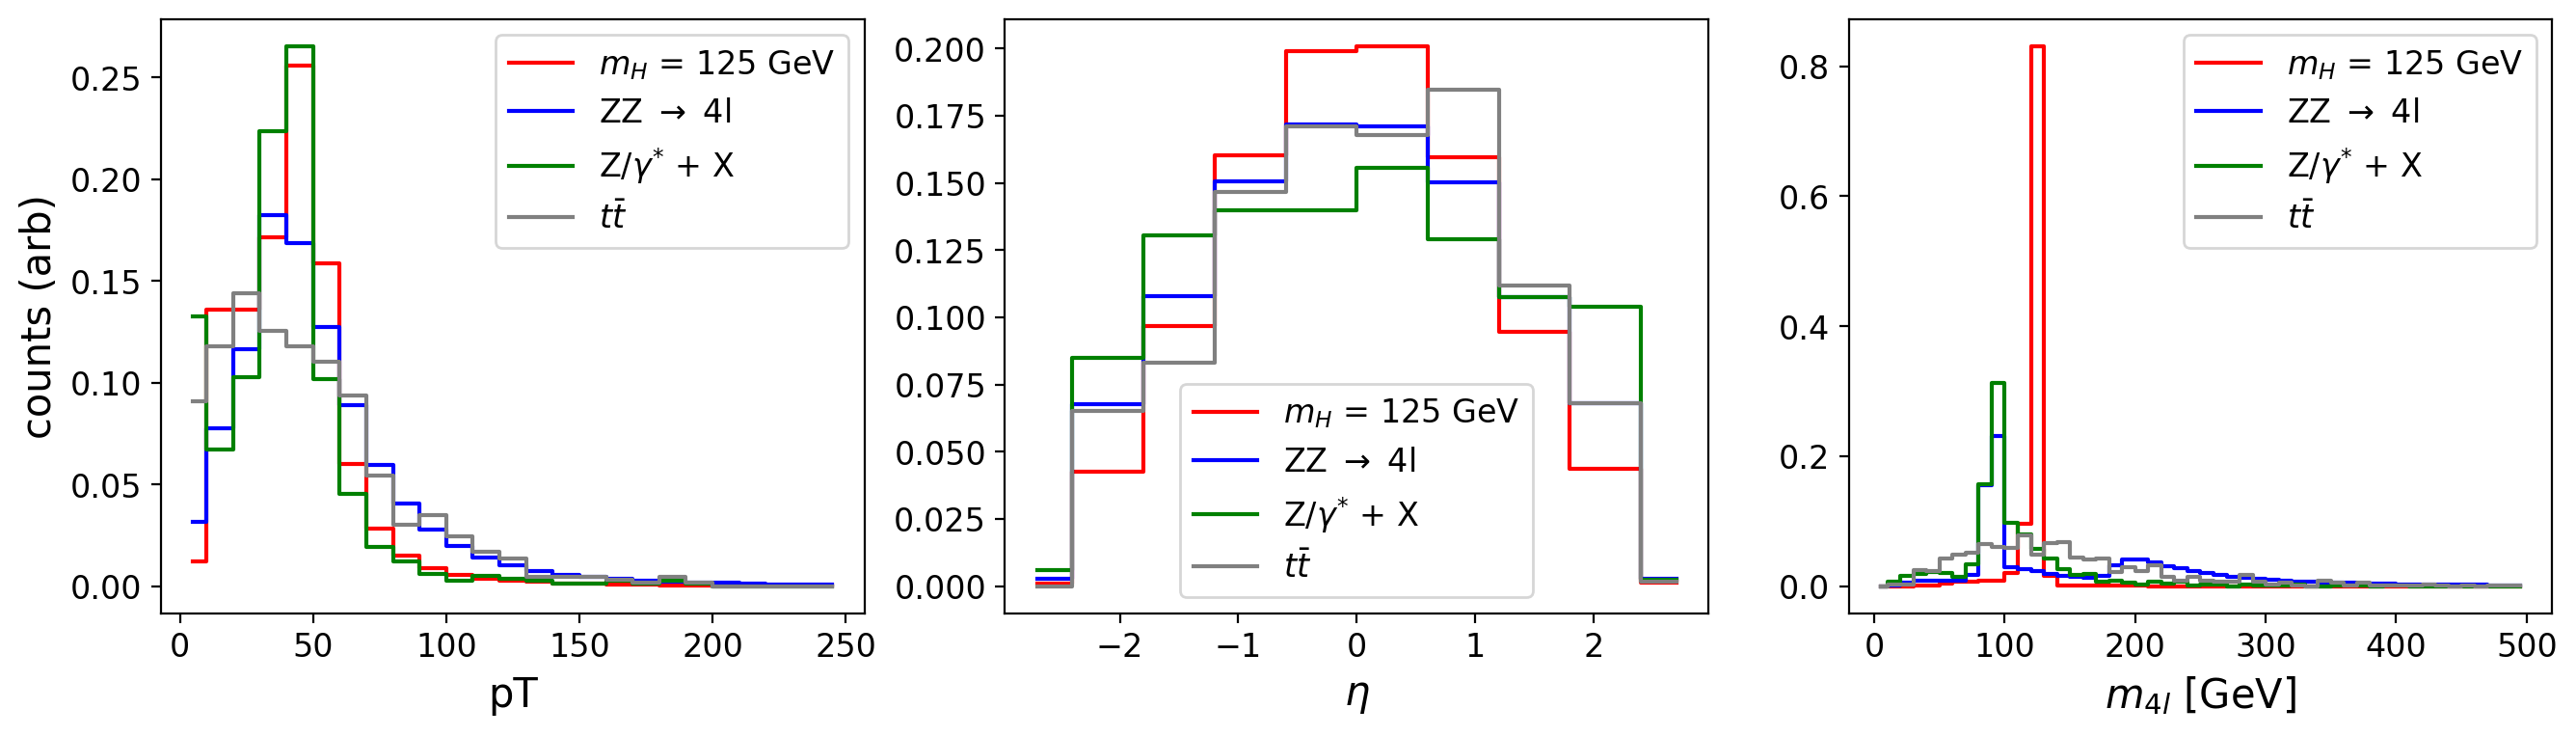

In [13]:
#>>>RUN: P3.6-runcell09

## Plots of transverse momenta, psuedorapidity, and invariant mass for different known processes, using the MC results.
## The plots allow you to see how the Higgs signal compares to the background signal for these parameters.
pt1_sig = pt(mc_sig['px1'], mc_sig['py1'])
pt1_bkg_zz = pt(mc_bkg_zz['px1'], mc_bkg_zz['py1'])
pt1_bkg_dy = pt(mc_bkg_dy['px1'], mc_bkg_dy['py1'])
pt1_bkg_tt = pt(mc_bkg_tt['px1'], mc_bkg_tt['py1'])

pt1 = [pt1_sig,pt1_bkg_zz,pt1_bkg_dy,pt1_bkg_tt]
eta1 = [mc_sig['eta1'], mc_bkg_zz['eta1'], mc_bkg_dy['eta1'], mc_bkg_tt['eta1']]
invM4l = [InvMass_4l(mc_sig),InvMass_4l(mc_bkg_zz),InvMass_4l(mc_bkg_dy),InvMass_4l(mc_bkg_tt)]

plt.figure(figsize = (16,4))
plt.subplot(1, 3, 1)
plt.ylabel('counts (arb)')
plt.xlabel('pT')
PlotShape(pt1, 0, 250, 25)
plt.subplot(1, 3, 2)
plt.xlabel('$\eta$')
PlotShape(eta1, -3, 3, 10)
plt.subplot(1, 3, 3)
plt.xlabel('$m_{4l}$ [GeV]')
PlotShape(invM4l, 0, 500, 50)

As we can see, the most distinct difference between the signal can be seen in the 4l invariant mass. Therefore, this is the distribution on top of which we'll be looking for the Higgs boson. A peak around 125GeV is a unique sign of the signal. In most analysis, we would see distinct shapes of a series of variables' distributions. Then we use the ones with the greatest separation between signal and background to perform the final fit.

<a name='problems_3_6'></a>     

| [Top](#section_3_0) | [Restart Section](#section_3_6) |

### <span style="border:3px; border-style:solid; padding: 0.15em; border-color: #90409C; color: #90409C;">Problem 3.6.1</span>

What distinguishes the Higgs from the others? Select the correct answer from the options below:

a. The Higgs is a narrow resonance and has a narrow mass peak\
b. The Higgs plot color is red\
c. The Higgs has more momentum of the individual particles\
d. All of the above\
e. none of the above

### <span style="border:3px; border-style:solid; padding: 0.15em; border-color: #90409C; color: #90409C;">Problem 3.6.2</span>

What is the mass peak at 91 GeV in the other backgrounds? 

a. W boson\
b. Higgs boson\
c. top quark\
d. Z boson

<h3> Making selections </h3>

In order to make selections, you may want to consider the following:

   - Should flavor and charge be conserved in all decay processes?
   - The Higgs to four leptons decay channel involves an intermediate step $H \to ZZ^* \to 4ℓ$. How does the intermediate process, and constraints on the Z boson, affect the mass of the final leptons?
    (question: how can the Higgs boson, as a particle of 125 GeV, decay via two Z bosons, with a sum of mass greater than the mass of the Higgs?)
   - You may want to read the original publication of the Higgs discovery[2]. The Hto4L part is on page 10, section 5.2 and provides sufficient information to make the data cuts for this assignment. Note that the Final-state radiation(FSR) correction part can be ignored since the photon information is not included in the dataset here.
   - Although the data and MC have been pre-processed to collections of four leptons, you may want to know what pre-processing has been done. This includes using data with:
       - Transverse impact parameter w.r.t. primary vertex, |dxy| < 0.5 cm 
       - Longitudinal impact parameter w.r.t. primary vertex, |dz| < 1 cm
       - 3D impact parameter significance, |SIP| < 4, where SIP = $I \sigma_I$, I is the 3D lepton impact parameter, and $\sigma_I$ is its uncertainty. This is to ensure that the lepton pairs from Z boson decays originate from the same primary vertex.
       - Muon and electron selection
           - Relative isolation of the lepton: relIso < 0.4 with $\Delta R$ = 0.4, where $\Delta R = \sqrt{(\Delta\eta)^2 + (\Delta\phi)^2}$, and relIso is defined as the scalar sum of the transverse momenta of the particles reconstructed within a distance $\Delta R$ of the object, normalised to the pT of the object; to quantify how isolated this object is.
           - You may want to apply more selections on the leptons?
  
[2] https://arxiv.org/pdf/1207.7235.pdf

### <span style="border:3px; border-style:solid; padding: 0.15em; border-color: #90409C; color: #90409C;">Problem 3.6.3</span>

In addition to lepton flavor conservation, another conservation law needs to be enforced in our selections. In the lab frame, what other property of the four leptons do we need to conserve in our selections that is a fundamental Higgs property?

### <span style="border:3px; border-style:solid; padding: 0.15em; border-color: #90409C; color: #90409C;">Problem 3.6.4</span>

In any of the decays into 2mu2e, 4mu, or 4e, what is the lowest invariant mass that the lower mass lepton pair should have? Report your answer as a integer, then define the value `lowerMinMass` by running the corresponding code cell in your notebook.

This value can be found in <a href="https://arxiv.org/pdf/1207.7235.pdf" target="_blank">here</a>. You will need to input this value into the `evt` function below.


In [ ]:
#>>>PROBLEM

lowerMinMass = None #ENTER YOUR NUBMBER HERE AND RUN THIS CELL

### <span style="border:3px; border-style:solid; padding: 0.15em; border-color: #90409C; color: #90409C;">Problem 3.6.5</span>

What is the highest invariant mass that the higher mass lepton pair should have?  Report your answer as a integer, then define the value `upperMinMass` by running the corresponding code cell in your notebook.

This value can be found in <a href="https://arxiv.org/pdf/1207.7235.pdf" target="_blank">here</a>. You will need to input this value into the `evt` function below.

In [ ]:
#>>>PROBLEM

upperMinMass = None #ENTER YOUR NUBMBER HERE AND RUN THIS CELL

Now we can make selections on the data. Below are four functions to help make these selections.

There are four functions:<br>
(1) obj:  
Function to perform object selection for a single object. Currently as an example, I apply a pt cut on the objects: if it is a muon, require pt > 5GeV, while for electron pt must be greater than 7 GeV. These numbers can be found in the Higgs publication <a href="https://arxiv.org/pdf/1207.7235.pdf" target="_blank">[2]</a>

(2) objsel:
For a given dataset, add a new column called "PassObj", it has a boolean value to indicate whether this event passes the object selection. Only when all 4 leptons pass the single object selection, we mark it as 1, otherwise it is 0. Iterate each event to assign the value of "PassObj"

(3) evt: Event selection. 
As an example, I simply applied PID1==11 and PID2=-11 to check the first lepton is an electron and the second lepton is an anti-electron (positron). For example, if the Higgs decays to 2e2mu (2 electrons and 2 muons), the electrons potentially pair.

**You probably  want to apply more cuts like the ones described above**

Maybe think about a better way to sum the particle ids to conserve lepton flavor. Also apply the minimum mass cuts on lepton pairs.

(4) evtsel: same as function objsel.
A new column is added called "PassEvt" to indicate whether and event passes the evet selection or not.


Next, we apply selections both to the data and MC results. From the print out of data, you can see that there are two more column at the end of each event "PassObj" and "PassEvt". Then we make the selection: require an event to pass both the object and event selection by <br>
data = data.query('PassObj == 1 and PassEvt == 1')

Go ahead and run the full chain with the current poor selection, select events and make the mass plot, once you have done that try to see if you can use the suggested cuts above and more to find the Higgs boson!

In [15]:
#>>>RUN: P3.6-runcell11

def obj(pid,px,py,eta):  ## object selection for a single object
    pt_obj = pt(px,py)
    if (np.abs(pid) == 13 and pt_obj > 5.) or (np.abs(pid) == 11 and pt_obj > 7.):## requires electrons and muons to have transverse momenta above certain level
        return 1
    else:
        return 0
    
    
def objsel(lis):  ## Create column indicating whether this event passes the object selection
    pass_obj = []
    for row in lis.itertuples():   ## loop over each event(each row)
        pass_obj.append(obj(row.PID1,row.px1,row.py1,row.eta1) and obj(row.PID2,row.px2,row.py2,row.eta2) and obj(row.PID3,row.px3,row.py3,row.eta3) and obj(row.PID4,row.px4,row.py4,row.eta4))
    lis['PassObj'] = pass_obj  

In [14]:
#>>>RUN: P3.6-runcell12

## Include your values for the upper and lower invariant mass of the leptop pairs
def evt(PID1,Q1,E1,px1,py1,pz1,PID2,Q2,E2,px2,py2,pz2,PID3,Q3,E3,px3,py3,pz3,PID4,Q4,E4,px4,py4,pz4):
    
    if Q1+Q2+Q3+Q4 != 0: #Charge conservation
        return 0
    
    ### All Pairwise Mass combinations
    ##c1
    m_z1_c1 = np.sqrt((E1+E2)**2 - ((px1+px2)**2 + (py1+py2)**2 + (pz1+pz2)**2))
    m_z2_c1 = np.sqrt((E3+E4)**2 - ((px3+px4)**2 + (py3+py4)**2 + (pz3+pz4)**2))
    ##c2
    m_z1_c2 = np.sqrt((E1+E3)**2 - ((px1+px3)**2 + (py1+py3)**2 + (pz1+pz3)**2))
    m_z2_c2 = np.sqrt((E2+E4)**2 - ((px2+px4)**2 + (py2+py4)**2 + (pz2+pz4)**2))
    ##c3
    m_z1_c3 = np.sqrt((E1+E4)**2 - ((px1+px4)**2 + (py1+py4)**2 + (pz1+pz4)**2))
    m_z2_c3 = np.sqrt((E2+E3)**2 - ((px2+px3)**2 + (py2+py3)**2 + (pz2+pz3)**2))

    ###NOTE: IF YOU DID NOT PREVIOUSLY DEFINE THE `lowerMinMass` and `upperMinMass`, do so here
    #lowerMinMass = #YOUR VALUE HERE
    #upperMinMass = #YOUR VALUE HERE

    ## to compare to the distribution without this selection, input 0 to the lower and upper MinMass.
    ## the difference shows the importance of these selections

    #note that the selections for lepton pairs can be improved your max and mins can be better than below
    #if max(m_z1_c1,m_z2_c1,m_z1_c2,m_z2_c2,m_z1_c3,m_z2_c3) < upperMinMass:
    #    return 0
    #if min(m_z1_c1,m_z2_c1,m_z1_c2,m_z2_c2,m_z1_c3,m_z2_c3) < lowerMinMass:
    #    return 0
   
    return 1
        


def evtsel(lis):   ### Similar as the Function: objsel shown above
    pass_evt = []
    for row in lis.itertuples():
        pass_evt.append(evt(row.PID1,row.Q1,row.E1,row.px1,row.py1,row.pz1,\
                            row.PID2,row.Q2,row.E2,row.px2,row.py2,row.pz2,\
                            row.PID3,row.Q3,row.E3,row.px3,row.py3,row.pz3,\
                            row.PID4,row.Q4,row.E4,row.px4,row.py4,row.pz4))
    lis['PassEvt'] = pass_evt
    
    


In [16]:
#>>>RUN: P3.6-runcell13

### Apply object selection and event selection to data and each MC process###
### This will take a little time to run, about a minute###

#Select Data
objsel(data)
evtsel(data)
sel_data = data.query('PassObj == 1 and PassEvt == 1')

#Select MC
mc_all,mc_sig,mc_bkg_zz,mc_bkg_dy,mc_bkg_tt=loadMC()
for i,bkg in enumerate(mc_all):
    for j,pro in enumerate(bkg):
        objsel(pro)
        evtsel(pro)
        mc_all[i][j] = pro.query('PassObj == 1 and PassEvt == 1')

/var/folders/4t/mwl83f3x1ls0jvy35v4qzj7c0000gp/T/ipykernel_76422/346850694.py:12: RuntimeWarning: invalid value encountered in sqrt
  m_z2_c1 = np.sqrt((E3+E4)**2 - ((px3+px4)**2 + (py3+py4)**2 + (pz3+pz4)**2))
/var/folders/4t/mwl83f3x1ls0jvy35v4qzj7c0000gp/T/ipykernel_76422/346850694.py:17: RuntimeWarning: invalid value encountered in sqrt
  m_z1_c3 = np.sqrt((E1+E4)**2 - ((px1+px4)**2 + (py1+py4)**2 + (pz1+pz4)**2))
/var/folders/4t/mwl83f3x1ls0jvy35v4qzj7c0000gp/T/ipykernel_76422/346850694.py:15: RuntimeWarning: invalid value encountered in sqrt
  m_z2_c2 = np.sqrt((E2+E4)**2 - ((px2+px4)**2 + (py2+py4)**2 + (pz2+pz4)**2))
/var/folders/4t/mwl83f3x1ls0jvy35v4qzj7c0000gp/T/ipykernel_76422/346850694.py:14: RuntimeWarning: invalid value encountered in sqrt
  m_z1_c2 = np.sqrt((E1+E3)**2 - ((px1+px3)**2 + (py1+py3)**2 + (pz1+pz3)**2))
/var/folders/4t/mwl83f3x1ls0jvy35v4qzj7c0000gp/T/ipykernel_76422/346850694.py:18: RuntimeWarning: invalid value encountered in sqrt
  m_z2_c3 = np.sqrt((E2+

Now,  let's take a look at the data and make the invariant mass plot!

Each Particle has its 4-momentum vector (E, px, py, pz) <br>

For the four lepton individually and the 4-lepton system we have:<br>

lepton1: p4_1 = (E1,px1,py1,pz1)<br>
lepton2: p4_2 = (E2,px2,py2,pz2)<br>
lepton3: p4_3 = (E3,px3,py3,pz3)<br>
lepton3: p4_4 = (E4,px4,py4,pz4)<br>
4-lepton: p4_4l = p4_1 + p4_2 + p4_3 + p4_4<br>
              = (E1+E2+E3+E4, px1+px2+px3+px4, py1+py2+py3+py4, pz1+pz2+pz3+pz4)<br>
              
Then the invariant mass of the 4-lepton system can be calculated:<br>
$m_{4l} = \sqrt{E_{4l}^2 - (px_{4l}^2 + py_{4l}^2 + pz_{4l}^2)}$

In [17]:
#>>>RUN: P3.6-runcell14

def HistInvMass4l(lis, scales, rmin, rmax, nbins):
    hist_lis = []
    for i,pro in enumerate(lis):
        invM = InvMass_4l(pro)
        hist, bins = np.histogram(invM, bins = nbins, range = (rmin,rmax))
        hist = hist * scales[i]
        hist_lis.append(hist)
    return sum(hist_lis)

def makeAllHists(idata,imc,rmin=50,rmax=200,nbins=50):
    hist_higgs = HistInvMass4l(imc[0],scales_higgs,rmin, rmax, nbins)
    hist_zz    = HistInvMass4l(imc[1],scales_zz,rmin, rmax, nbins)
    hist_dy    = HistInvMass4l(imc[2],scales_dy,rmin, rmax, nbins)
    hist_tt    = HistInvMass4l(imc[3],scales_tt,rmin, rmax, nbins)
    out_hist_mc    = [hist_tt, hist_dy, hist_zz, hist_higgs]

    inM_data = InvMass_4l(idata)
    out_hist_data, bins = np.histogram(inM_data, bins = nbins, range = (rmin,rmax))
    return out_hist_mc,out_hist_data

hist_mc,hist_data=makeAllHists(sel_data,mc_all)

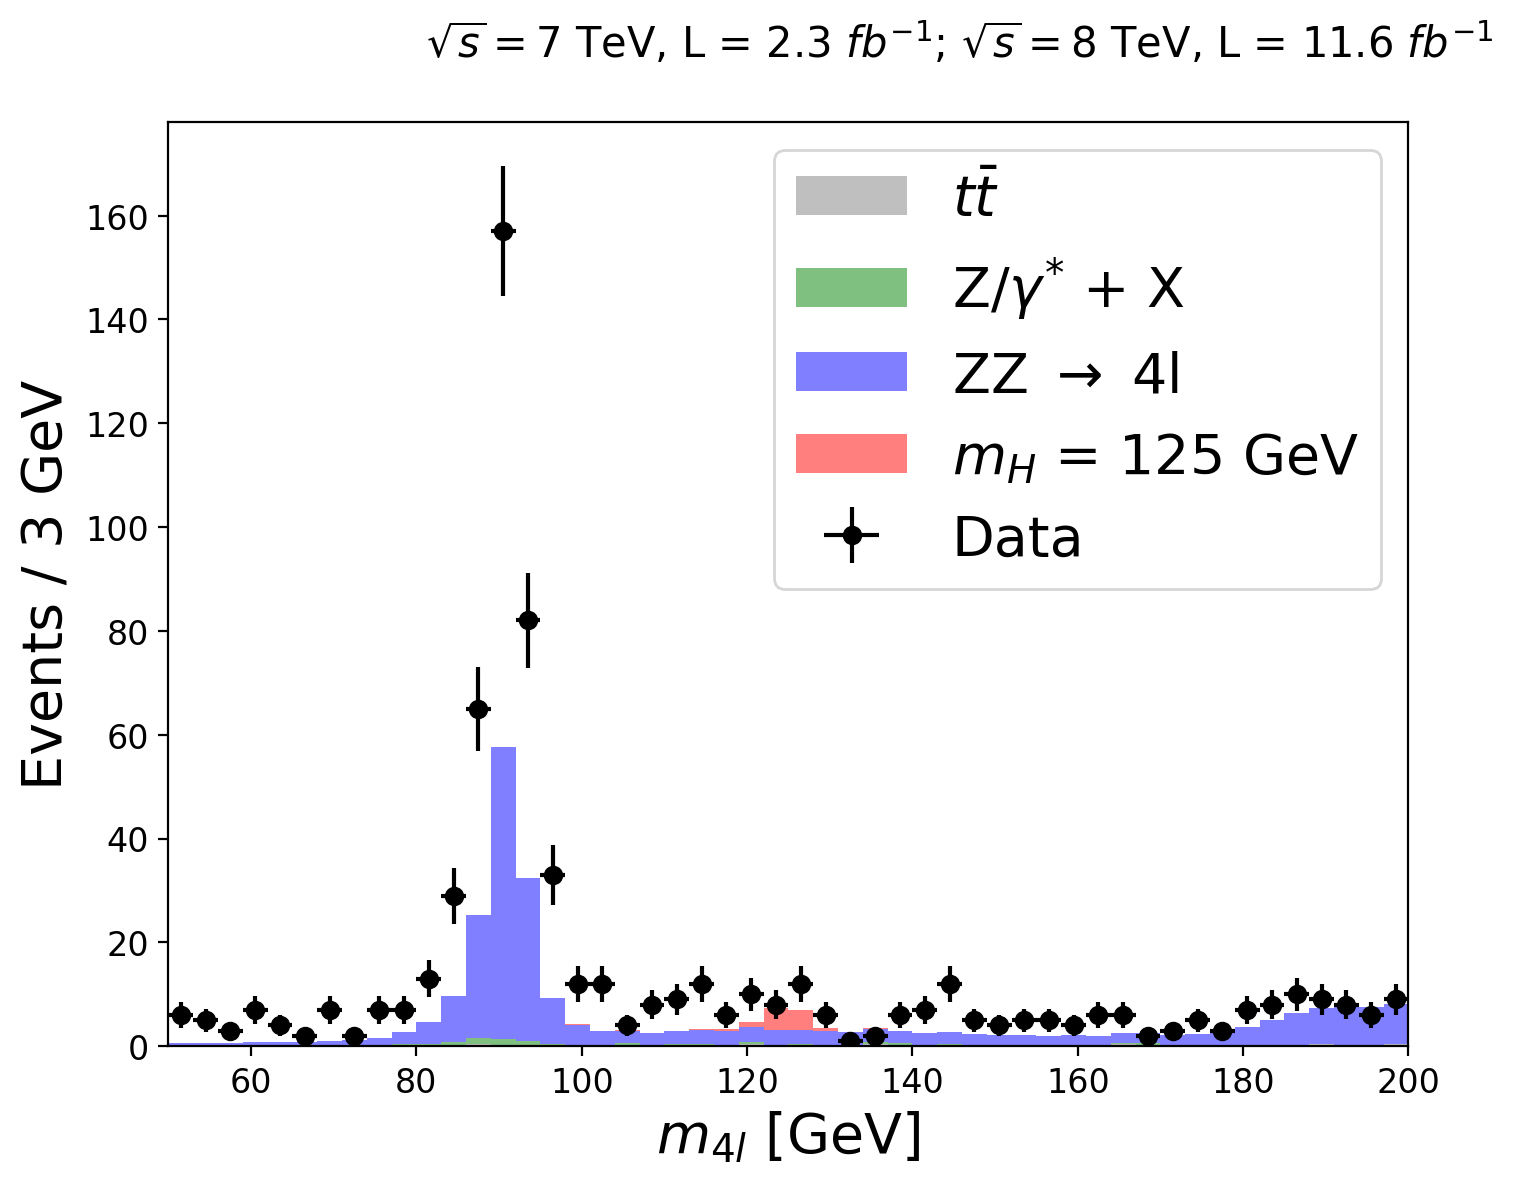

In [18]:
#>>>RUN: P3.6-runcell15

## Now Plot it!

def plotHists(ihist_mc,ihist_data,rmin=50,rmax=200,nbins=50):
    plt.figure(figsize = (8,6))
    # plt.style.use('mystyle.mplstyle')
    binwidth  = (rmax-rmin)//nbins
    bincenter = np.arange(rmin+binwidth*0.5,rmax+binwidth*0.5,binwidth)
    ## MC
    for i,pro in enumerate(ihist_mc):
        if i == 0:
            stack = plt.bar(bincenter, pro, align = 'center', width = binwidth, color = colors[3-i], label=labels[3-i],
            alpha = 0.5)
            bot = pro
        else:
            stack = plt.bar(bincenter, pro, align = 'center', width = binwidth, color = colors[3-i], label=labels[3-i],
                 bottom = bot, alpha = 0.5)
            bot = bot + pro

    ## Measured data
    xerrs = [binwidth*0.5 for i in range(0, nbins)]
    yerrs = np.sqrt(ihist_data)
    marker_data = plt.errorbar(bincenter, ihist_data, xerr = xerrs, yerr = yerrs, linestyle = 'None', color = 'black',
                        marker = 'o', label = 'Data')

    plt.title('$ \sqrt{s} = 7$ TeV, L = 2.3 $fb^{-1}$; $\sqrt{s} = 8$ TeV, L = 11.6 $fb^{-1}$ \n', fontsize = 15, position=(0.64,0.95))
    plt.xlabel('$m_{4l}$ [GeV]',fontsize = 20, position=(0.92,0.1))
    plt.ylabel('Events / 3 GeV',fontsize = 20, position=(0.1,0.84))
    plt.xlim(rmin,rmax)
    plt.legend(fontsize = 20)
    plt.show()

plotHists(hist_mc,hist_data)

### <span style="border:3px; border-style:solid; padding: 0.15em; border-color: #90409C; color: #90409C;">Problem 3.6.6</span>

Now that you have run through making a plot, try to get the Higgs boson using all the hints above. Specifically, write a function `select_pairs()` that improves the selections for lepton pairs.

This function will be used in the function `env()` below, and after you write this implementation, you will have completed the full selection code! Run the cell after this problem to generate a plot.

In [19]:
#>>>PROBLEM: P3.6.6
# Use this cell for drafting your solution (if desired),
# then enter your solution in the interactive problem online to be graded.

def select_pairs(PID1,PID2,PID3,m_z1_c1,m_z2_c1,m_z1_c2,m_z2_c2,m_z1_c3,m_z2_c3,upperMinMass,lowerMinMass):
    if(abs(PID1) != PID2 and abs(PID1) != abs(PID3)): ### 2mu2e event, only one combination c3
        m_z1 = m_z1_c3
        m_z2 = m_z2_c3
        if max(m_z1,m_z2) < upperMinMass:
            return 0
        if min(m_z1,m_z2) < lowerMinMass:
            return 0
        
    elif(abs(PID1) != PID2): ### 2mu2e event, only one combination c2
        m_z1 = m_z1_c2
        m_z2 = m_z2_c2
        if max(m_z1,m_z2) < upperMinMass:
            return 0
        if min(m_z1,m_z2) < lowerMinMass:
            return 0
        
    else: ### 4mu or 4e event, 3 different combination
        if max(m_z1_c1,m_z2_c1,m_z1_c2,m_z2_c2,m_z1_c3,m_z2_c3) < upperMinMass:
            return 0
        if min(m_z1_c1,m_z2_c1,m_z1_c2,m_z2_c2,m_z1_c3,m_z2_c3) < lowerMinMass:
            return 0


/var/folders/4t/mwl83f3x1ls0jvy35v4qzj7c0000gp/T/ipykernel_76422/369797145.py:9: RuntimeWarning: invalid value encountered in sqrt
  m_z2_c1 = np.sqrt((E3+E4)**2 - ((px3+px4)**2 + (py3+py4)**2 + (pz3+pz4)**2))
/var/folders/4t/mwl83f3x1ls0jvy35v4qzj7c0000gp/T/ipykernel_76422/369797145.py:14: RuntimeWarning: invalid value encountered in sqrt
  m_z1_c3 = np.sqrt((E1+E4)**2 - ((px1+px4)**2 + (py1+py4)**2 + (pz1+pz4)**2))
/var/folders/4t/mwl83f3x1ls0jvy35v4qzj7c0000gp/T/ipykernel_76422/369797145.py:12: RuntimeWarning: invalid value encountered in sqrt
  m_z2_c2 = np.sqrt((E2+E4)**2 - ((px2+px4)**2 + (py2+py4)**2 + (pz2+pz4)**2))
/var/folders/4t/mwl83f3x1ls0jvy35v4qzj7c0000gp/T/ipykernel_76422/369797145.py:11: RuntimeWarning: invalid value encountered in sqrt
  m_z1_c2 = np.sqrt((E1+E3)**2 - ((px1+px3)**2 + (py1+py3)**2 + (pz1+pz3)**2))
/var/folders/4t/mwl83f3x1ls0jvy35v4qzj7c0000gp/T/ipykernel_76422/369797145.py:15: RuntimeWarning: invalid value encountered in sqrt
  m_z2_c3 = np.sqrt((E2+E

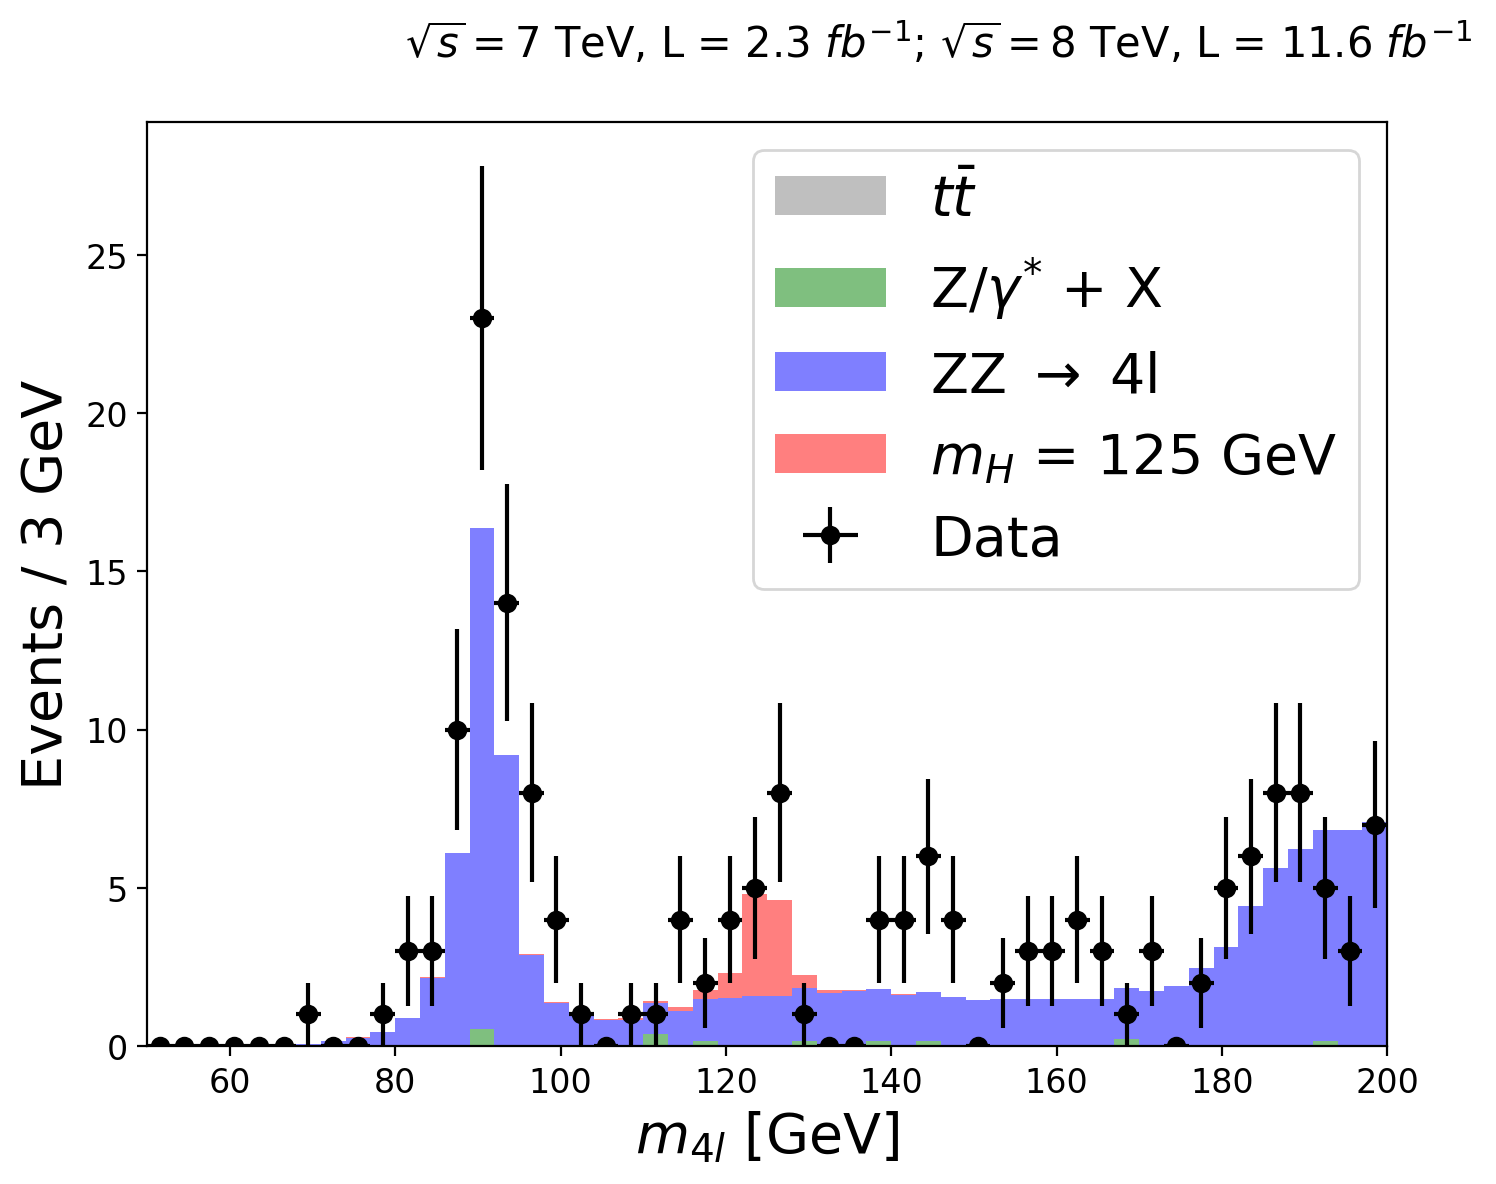

In [20]:
def evt(PID1,Q1,E1,px1,py1,pz1,PID2,Q2,E2,px2,py2,pz2,PID3,Q3,E3,px3,py3,pz3,PID4,Q4,E4,px4,py4,pz4):
    
    if PID1+PID2+PID3+PID4 != 0: #Charge conservation
        return 0
    
    ### All Pairwise Mass combinations
    ##c1
    m_z1_c1 = np.sqrt((E1+E2)**2 - ((px1+px2)**2 + (py1+py2)**2 + (pz1+pz2)**2))
    m_z2_c1 = np.sqrt((E3+E4)**2 - ((px3+px4)**2 + (py3+py4)**2 + (pz3+pz4)**2))
    ##c2
    m_z1_c2 = np.sqrt((E1+E3)**2 - ((px1+px3)**2 + (py1+py3)**2 + (pz1+pz3)**2))
    m_z2_c2 = np.sqrt((E2+E4)**2 - ((px2+px4)**2 + (py2+py4)**2 + (pz2+pz4)**2))
    ##c3
    m_z1_c3 = np.sqrt((E1+E4)**2 - ((px1+px4)**2 + (py1+py4)**2 + (pz1+pz4)**2))
    m_z2_c3 = np.sqrt((E2+E3)**2 - ((px2+px3)**2 + (py2+py3)**2 + (pz2+pz3)**2))

    ###NOTE: IF YOU DID NOT PREVIOUSLY DEFINE THE `lowerMinMass` and `upperMinMass`, do so here
    lowerMinMass = 12
    upperMinMass = 40

    if select_pairs(PID1,PID2,PID3,m_z1_c1,m_z2_c1,m_z1_c2,m_z2_c2,m_z1_c3,m_z2_c3,upperMinMass,lowerMinMass) == 0:
      return 0
        
    return 1
        

objsel(data)
evtsel(data)
sel_data = data.query('PassObj == 1 and PassEvt == 1')
mc_all,mc_sig,mc_bkg_zz,mc_bkg_dy,mc_bkg_tt=loadMC()
for i,bkg in enumerate(mc_all):
    for j,pro in enumerate(bkg):
        objsel(pro)
        evtsel(pro)
        mc_all[i][j] = pro.query('PassObj == 1 and PassEvt == 1')

hist_mc,hist_data=makeAllHists(sel_data,mc_all)
plotHists(hist_mc,hist_data)

In particle physics, and also for the actual Higgs boson discovery in 2012, researchers perform "blind analysis". Blind analysis involves optimizing the selections with MC first without looking at the data. The selections are only applied to the data once they are finalized on the MC alone. This avoid the possibility of biasing the result toward researchers' preconceptions by preventing them from knowing the answer until the analysis is complete. Here this is not required, you can always look at your data and go back to modify your analysis flow. In fact, we will even analyze the MC to get an idea of what we should expect for our signal.

### <span style="border:3px; border-style:solid; padding: 0.15em; border-color: #90409C; color: #90409C;">Problem 3.6.7</span>

When you make the plot above, comment on the agreement between data and the simulated prediction. Is the data high or low compared to the simulation? 


### <span style="border:3px; border-style:solid; padding: 0.15em; border-color: #90409C; color: #90409C;">Problem 3.6.8</span>

Fit a gaussian to only the MC Higgs peak. What is the mass and width of this feature in GeV, with 1e-1 precision?

To answer this and the following questions, only include the selections already outlined in the code. Use your selections to improve upon these results!

amp <Parameter 'amp', value=3.801785145385844 +/- 0.0553, bounds=[-inf:inf]>
x0 <Parameter 'x0', value=124.8080979516374 +/- 0.0367, bounds=[-inf:inf]>
sigma <Parameter 'sigma', value=3.3538478003436536 +/- 0.0594, bounds=[-inf:inf]>


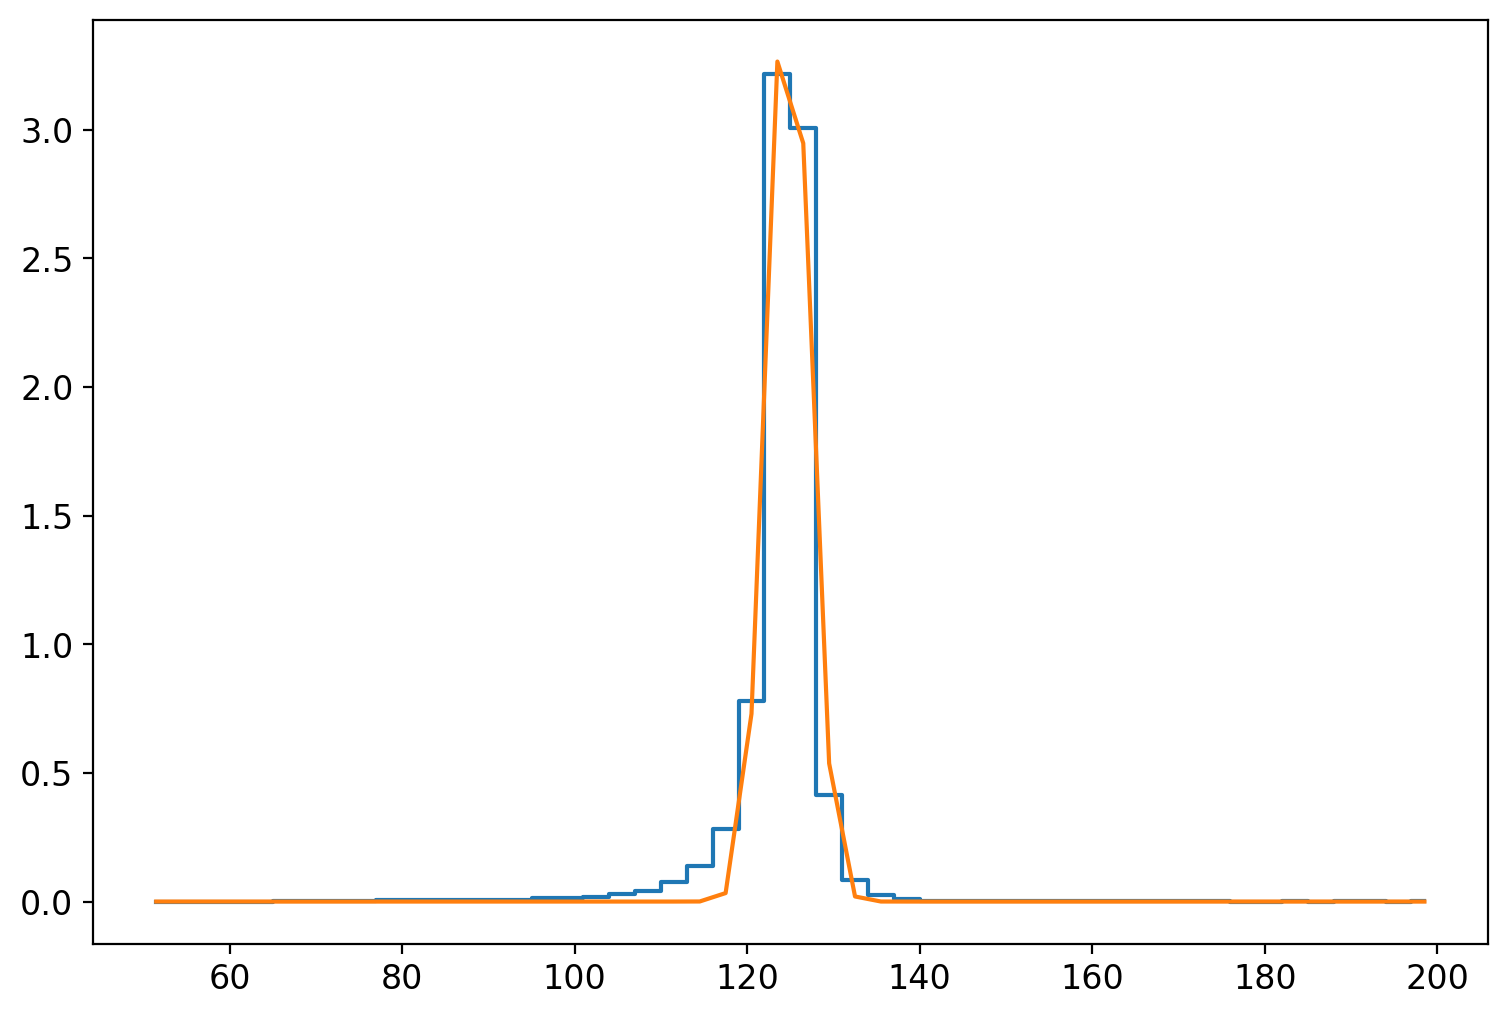

In [21]:
#>>>PROBLEM: P3.6.8
# Use this cell for drafting your solution (if desired),
# then enter your solution in the interactive problem online to be graded.

## fit the Higgs MC width and center to find a first guess for discovery analysis
rmin=50
rmax=200
nbins=50
binwidth  = (rmax-rmin)//nbins
bincenter = np.arange(rmin+binwidth*0.5,rmax+binwidth*0.5,binwidth)

higgsMC = hist_mc[3]
plt.plot(bincenter,higgsMC,drawstyle = 'steps-mid')

def fitModel(iX,iY,iFunc):
    model  = lmfit.Model(iFunc)
    p = model.make_params(amp=0,x0=125,sigma=2)
    result = model.fit(data=iY,params=p,x=iX)
    output = model.eval(params=result.params,x=iX)
    return output,result

def gauss1d(x,amp,x0,sigma):
    return np.abs(amp)*np.exp(-(x-x0)**2/sigma**2)

out,res = fitModel(bincenter,higgsMC,gauss1d)
plt.plot(bincenter,out)

for paramName, paramValue in res.params.items():
  print(paramName, paramValue)

### <span style="border:3px; border-style:solid; padding: 0.15em; border-color: #90409C; color: #90409C;">Problem 3.6.9</span>

Now take the whole selection and fit a linear polynomial+gaussian for the signal to the Higgs selected data. Following the Gaussian fit of the signal, fix the width to sigma=3 GeV.  What is your signal significance? (NB: for now don't bother to do the whole signficiance, just look at the significance of the fit parameter `amp`). Express your answer in terms of standard deviations, with precision 1e-1 (e.g., 1.1 stdev, 4.6 stdev, etc.).

To answer this and the following questions, only include the selections already outlined in the code. Use your selections to improve upon these results!

[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 56
    # data points      = 17
    # variables        = 4
    chi-square         = 9.95460052
    reduced chi-square = 0.76573850
    Akaike info crit   = -1.09803511
    Bayesian info crit = 2.23481827
    R-squared          = 0.83376404
[[Variables]]
    p0:     0.04444959 +/- 0.01659366 (37.33%) (init = 0)
    p1:    -3.67359345 +/- 2.12087686 (57.73%) (init = 0)
    amp:    27.4055395 +/- 11.7317218 (42.81%) (init = 25)
    mh:     123.116465 +/- 1.50102315 (1.22%) (init = 125)
    sigma:  3 (fixed)
[[Correlations]] (unreported correlations are < 0.100)
    C(p0, p1)  = -0.987
    C(amp, mh) = 0.147
    C(p0, mh)  = -0.113
    C(p1, mh)  = 0.102


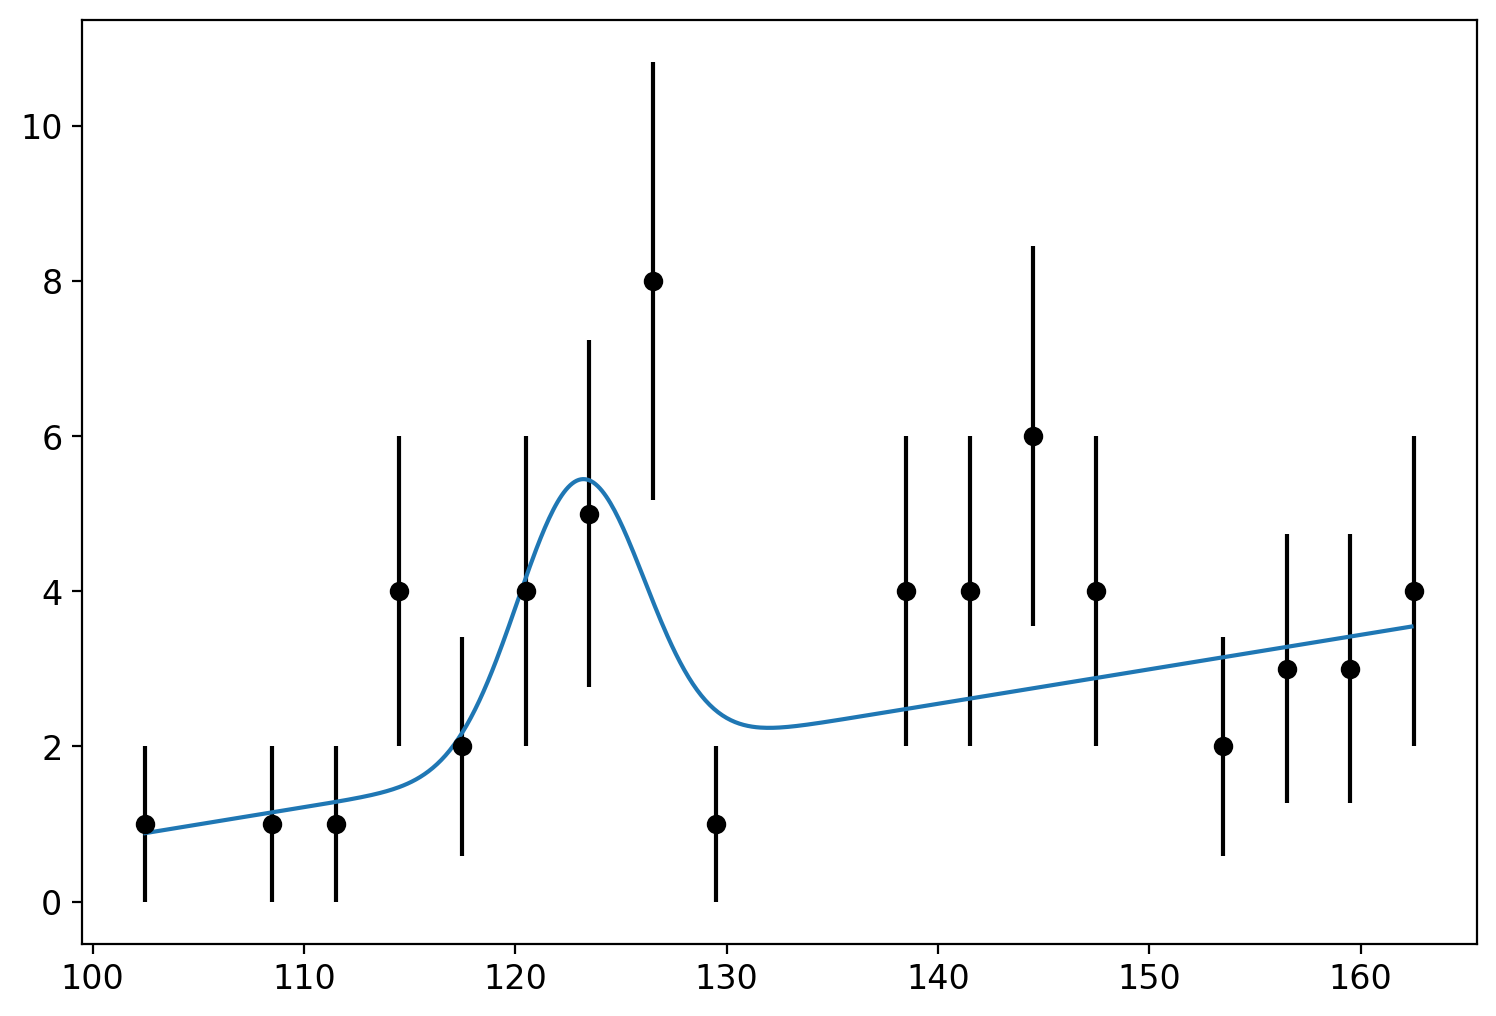

In [27]:
#>>>PROBLEM: P3.6.9

def pol2(x, p0, p1,mh,sigma):
    pols=[p0,p1]
    y = np.polyval(pols,x)
    return y

def sigpol2(x,p0,p1,amp,mh,sigma):
    bkg=pol2(x,p0,p1,mh,sigma)
    sig=amp*stats.norm.pdf(x,mh,sigma)
    return sig+bkg

def fitModelMFix(iX,iY,iWeights,iFunc):
    model  = lmfit.Model(iFunc)
    p = model.make_params(mh=125,p0=0,p1=0,amp=25,sigma=3)
    p["sigma"].min=2
    p["sigma"].max=6
    p["sigma"].vary=False
    #your code p = model.make_params(...)
    result = model.fit(data=iY,params=p,x=iX,weights=iWeights)
    #now make a fine binned evaluation of the fit
    xinterp = np.arange(iX[0],iX[-1],0.1)
    output = model.eval(params=result.params,x=xinterp)
    return xinterp,output,result

def makeHistAndFit(ihist_data,rmin=50,rmax=200,nbins=50):
    binwidth    = (rmax-rmin)//nbins
    bincenter   =  np.arange(rmin+binwidth*0.5,rmax+binwidth*0.5,binwidth)
    #pre cut the small region for fitting
    smallrange  =  bincenter [(bincenter > 100) & (bincenter < 165) & (ihist_data > 0)]
    smallhist   =  ihist_data[(bincenter > 100) & (bincenter < 165) & (ihist_data > 0)]
    smallweight = (ihist_data[(bincenter > 100) & (bincenter < 165) & (ihist_data > 0)])**0.5
    #now fit
    xinterp,output,result2 = fitModelMFix(smallrange,smallhist,1./smallweight,sigpol2)
    #now plot
    plt.errorbar(smallrange,smallhist, yerr = smallweight, linestyle = 'None', color = 'black', marker = 'o', label = 'Data')
    plt.plot(xinterp,output)
    lmfit.report_fit(result2)
    plt.show()

makeHistAndFit(hist_data)

This fit looks ok, but we can do better using our simulation. Using the simulation, we can actually build functions by just throwing it to the data. To give you two ways to do this, let's first use a spline interpolated function. So what happened is, we just took the data and turned it into a smooth function that we can evaulate anywhere. This is done by chunking up the data into little pieces and fitting higher order polynomials to each. We end up with a function.

Since its a function, we can do whatever we want with it. Ok so lets go ahead and take our existing histograms and interpolate them so that we can turn them into a function. Let's go ahead and plot our histgrams and then turn them into functions.

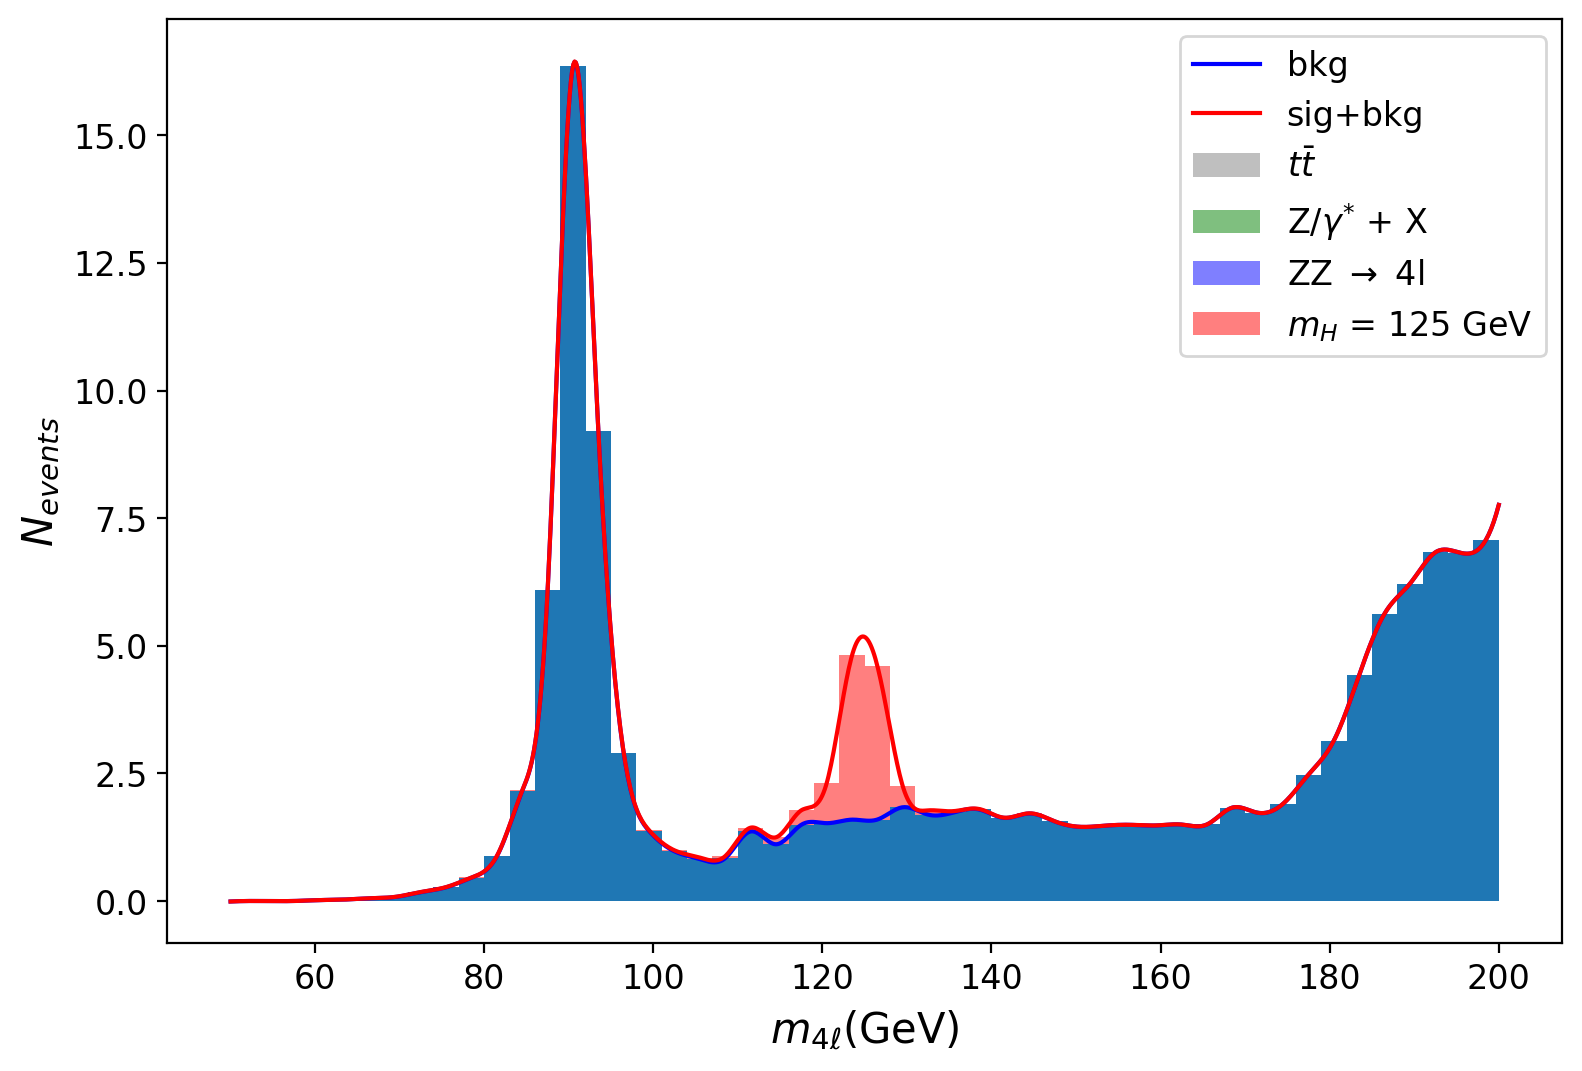

In [28]:
#>>>RUN: P3.6-runcell16

#load the interpolation package
from scipy import interpolate

def setupSpline(ihist_mc,rmin=50,rmax=200,nbins=50):
    binwidth    = (rmax-rmin)//nbins
    bincenter   =  np.arange(rmin+binwidth*0.5,rmax+binwidth*0.5,binwidth)
    sig=hist_mc[-1]
    ## Sum over all the backgrounds and plot at the same time
    sumbkg=0
    for i,pro in enumerate(ihist_mc):
        if i == 0:
            stack = plt.bar(bincenter, pro, align = 'center', width = binwidth, color = colors[3-i], label=labels[3-i],alpha = 0.5)
            bot = pro
        else:
            stack = plt.bar(bincenter, pro, align = 'center', width = binwidth, color = colors[3-i], label=labels[3-i],bottom = bot, alpha = 0.5)
            bot = bot + pro
        if i == 2:
            sumbkg = bot
    plt.bar(bincenter,sumbkg,align='center',width=binwidth)

    #spline interpolate
    out_bkg_interpolate = interpolate.splrep(bincenter, sumbkg)
    out_sig_interpolate = interpolate.splrep(bincenter, sig)

    #Now plot the splines as a function evaluation
    x_int = np.linspace(50, 200,1000)
    #this is the evalution
    y_bkg = interpolate.splev(x_int, out_bkg_interpolate)
    y_sig = interpolate.splev(x_int, out_sig_interpolate)
    plt.plot(x_int, y_bkg, 'b',label='bkg')
    plt.plot(x_int, y_sig+y_bkg, 'r',label='sig+bkg')
    #plt.plot(x,y_mc,drawstyle = 'steps-mid')
    plt.xlabel("$m_{4\ell}$(GeV)")
    plt.ylabel("$N_{events}$")
    plt.legend()
    plt.show()
    return out_sig_interpolate,out_bkg_interpolate

sig_interpolate,bkg_interpolate=setupSpline(hist_mc)

Now we have two functions from interpolating the MC result, we can treat them as functions. We have one function for signal and one function for background. First, let's see what happens when we fit the data with these new functions. This is not going to be the most realistic fit, but its a good example to start with.

[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 7
    # data points      = 37
    # variables        = 2
    chi-square         = 36.5032492
    reduced chi-square = 1.04294998
    Akaike info crit   = 3.49988446
    Bayesian info crit = 6.72172029
    R-squared          = 0.94325602
[[Variables]]
    bkgnorm:  1.14458153 +/- 0.10656857 (9.31%) (init = 1)
    signorm:  1.25207632 +/- 0.54797363 (43.77%) (init = 1)
[[Correlations]] (unreported correlations are < 0.100)
    C(bkgnorm, signorm) = -0.170


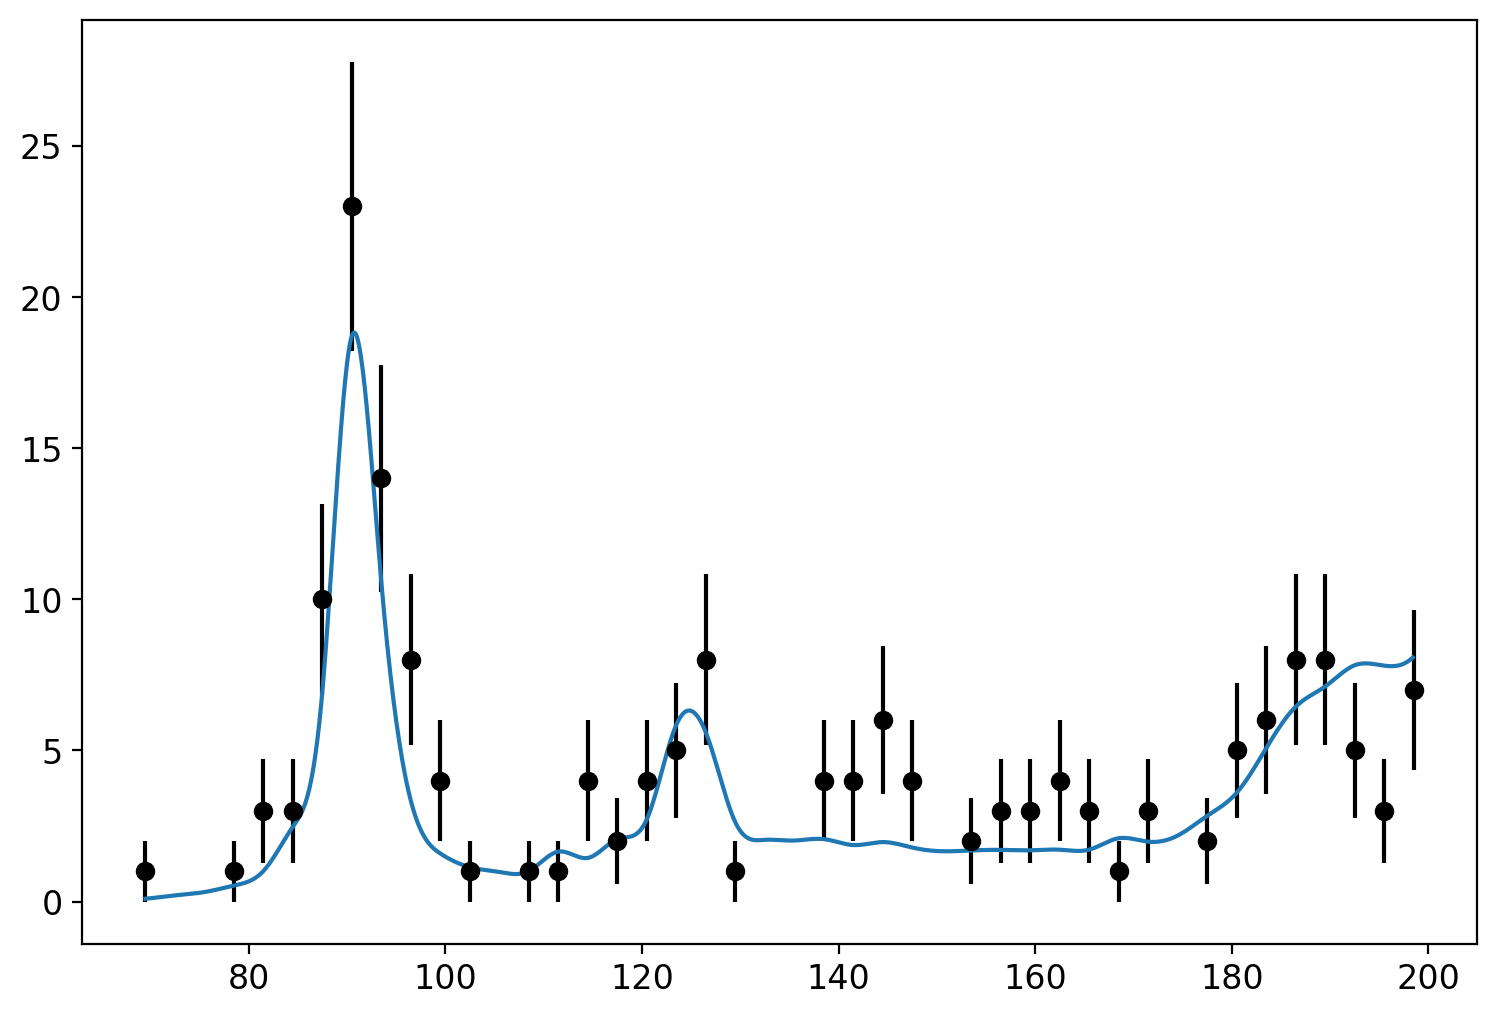

In [29]:
#>>>RUN: P3.6-runcell17

#ok lets setup the fit now that we have the ability to interpolate 
#as a first pass we will just fit the data with lmfit
import lmfit 

def sigbkg(x,bkgnorm=1,signorm=1):
    y_bkg = interpolate.splev(x, bkg_interpolate)
    y_sig = interpolate.splev(x, sig_interpolate)
    return y_bkg*bkgnorm + y_sig*signorm

def fitModel(iX,iY,iWeights,iFunc):
    model  = lmfit.Model(iFunc)
    p = model.make_params(bkgnorm=1,signnorm=1)
    result = model.fit(data=iY,params=p,x=iX,weights=iWeights)
    xinterp = np.arange(iX[0],iX[-1],0.1)
    output = model.eval(params=result.params,x=xinterp)
    return xinterp,output,result

def fithistograms(idata_hist,rmin=50,rmax=200,nbins=50):
    binwidth    = (rmax-rmin)//nbins
    bincenter   =  np.arange(rmin+binwidth*0.5,rmax+binwidth*0.5,binwidth)
    nonzerobin = bincenter[idata_hist > 0]
    nonzerohist= idata_hist[idata_hist > 0]
    error      = np.sqrt(idata_hist[idata_hist > 0])
    xinterp,output,result2 = fitModel(nonzerobin,nonzerohist,1./error,sigbkg)
    plt.errorbar(nonzerobin,nonzerohist, yerr = error, linestyle = 'None', color = 'black', marker = 'o', label = 'Data')
    plt.plot(xinterp,output)
    lmfit.report_fit(result2)
    plt.show()

fithistograms(hist_data)

The above fit to the data is not great, the strength of the signal in the fit is barely two sigma. So far, this fit enforces the data to have the same shape as the MC results. It is not fitting for a Higgs boson mass, it just fits for the strength of the signal amplitude. We can both improve the fit and get a first measure of the Higgs boson mass from our data selections by allowing the Higgs mass to vary!

The following function includes a variable shift in the x axis to allow for a varying Higgs mass. 

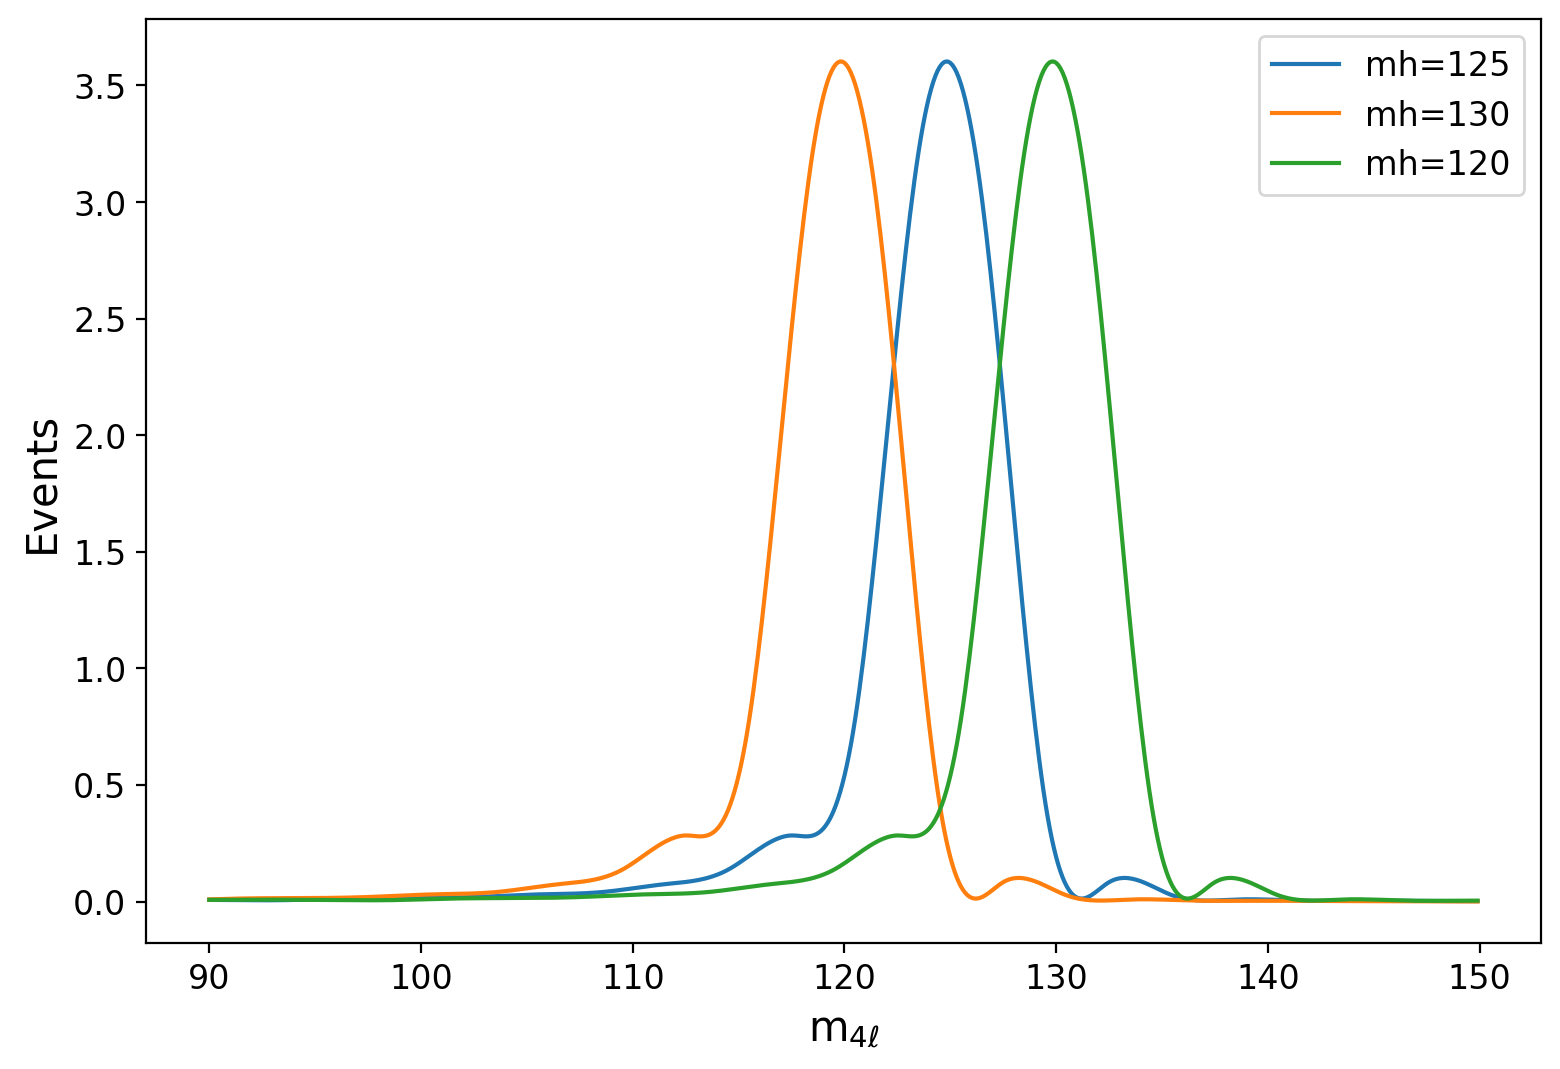

In [30]:
#>>>RUN: P3.6-runcell18

def sig(x,mh):
    y_sig = interpolate.splev(x+(mh-125), sig_interpolate)
    return y_sig

xaxis=np.arange(90,150,0.1)
ydown=sig(xaxis,120)
ybase=sig(xaxis,125)
yup  =sig(xaxis,130)

plt.plot(xaxis,ybase,label='mh=125')
plt.plot(xaxis,yup,label='mh=130')
plt.plot(xaxis,ydown,label='mh=120')
plt.xlabel('m$_{4\ell}$')
plt.ylabel('Events')
plt.legend()
plt.show()


### <span style="border:3px; border-style:solid; padding: 0.15em; border-color: #90409C; color: #90409C;">Problem 3.6.10</span>

What do you measure to be the Higgs boson mass in GeV, by allowing a shift in the x axis of the fit function? Use the precision that makes sense given the fit uncertainty.

[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 96
    # data points      = 37
    # variables        = 4
    chi-square         = 35.7301894
    reduced chi-square = 1.08273301
    Akaike info crit   = 6.70788821
    Bayesian info crit = 13.1515599
    R-squared          = 0.94445773
[[Variables]]
    mh:       125.783344 +/- 1.35043955 (1.07%) (init = 125)
    shift:   -0.09372954 +/- 0.61412673 (655.21%) (init = 0)
    bkgnorm:  1.14997795 +/- 0.10959393 (9.53%) (init = 1)
    signorm:  1.30474765 +/- 0.55109159 (42.24%) (init = 1)
[[Correlations]] (unreported correlations are < 0.100)
    C(bkgnorm, signorm) = -0.153
    C(mh, signorm)      = -0.145
    C(shift, bkgnorm)   = -0.137


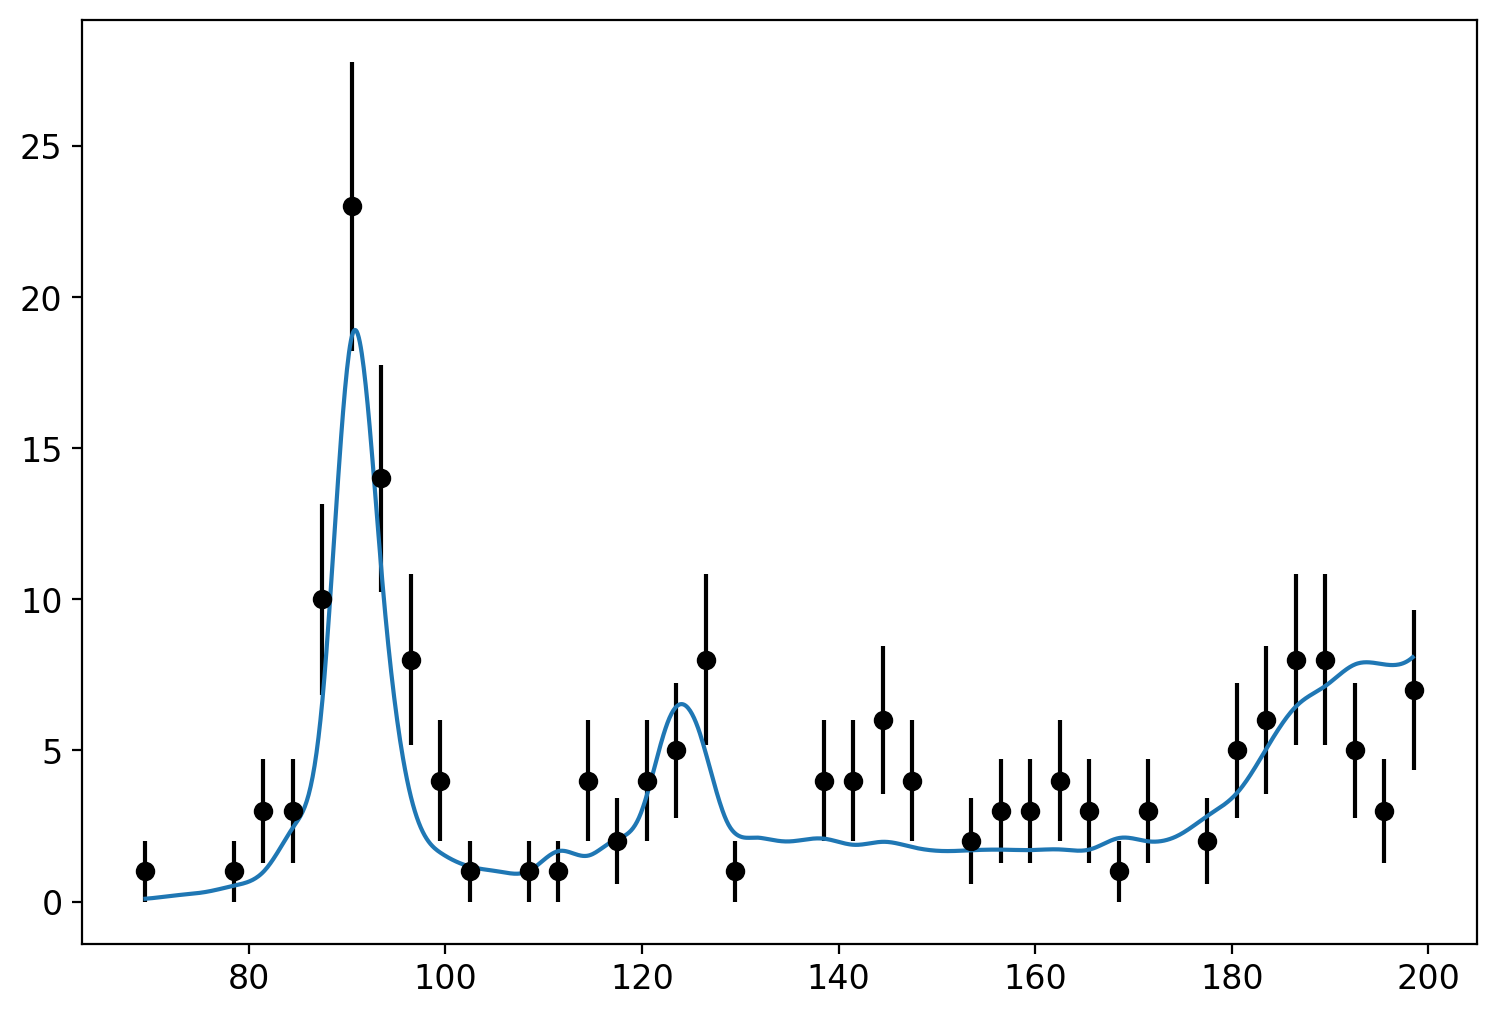

35.73018938364901


In [32]:
#>>>PROBLEM
# Use this cell for drafting your solution (if desired),
# then enter your solution in the interactive problem online to be graded.

def sigbkg(x,mh,shift,bkgnorm=1,signorm=1):
    y_bkg = interpolate.splev(x+shift, bkg_interpolate)
    y_sig = interpolate.splev(x+(mh-125), sig_interpolate)
    return y_bkg*bkgnorm + y_sig*signorm

def fitModel(iX,iY,iWeights,iFunc):
    model  = lmfit.Model(iFunc)
    p = model.make_params(mh=125,shift=0,bkgnorm=1,signnorm=1)
    result = model.fit(data=iY,params=p,x=iX,weights=iWeights)
    xinterp = np.arange(iX[0],iX[-1],0.1)
    output = model.eval(params=result.params,x=xinterp)
    return xinterp,output,result

def fithistograms(idata_hist,ifunc,rmin=50,rmax=200,nbins=50):
    binwidth    = (rmax-rmin)//nbins
    bincenter   =  np.arange(rmin+binwidth*0.5,rmax+binwidth*0.5,binwidth)
    nonzerobin = bincenter[idata_hist > 0]
    nonzerohist= idata_hist[idata_hist > 0]
    error      = np.sqrt(idata_hist[idata_hist > 0])
    xinterp,output,result2 = fitModel(nonzerobin,nonzerohist,1./error,ifunc)
    plt.errorbar(nonzerobin,nonzerohist, yerr = error, linestyle = 'None', color = 'black', marker = 'o', label = 'Data')
    plt.plot(xinterp,output)
    lmfit.report_fit(result2)
    plt.show()
    return result2.chisqr

chi2sig=fithistograms(hist_data,sigbkg)
print(chi2sig)

We have performed a measurement of the mass of the Higgs boson! However, lets do this with the full hypothesis test. First, lets setup a background only fit without signal and fit it to the data. 

In [ ]:
#>>>RUN: P3.6-runcell19

import scipy.optimize as optimize

def shiftbkg(x,mh,shift,bkgnorm=1):
    y_bkg = interpolate.splev(x+shift, bkg_interpolate)
    return y_bkg*bkgnorm

chi2bkg=fithistograms(hist_data,shiftbkg)

To see how significant this Higgs bump we have measured, lets compute delta chi2 and translate this to a p-value.

### <span style="border:3px; border-style:solid; padding: 0.15em; border-color: #90409C; color: #90409C;">Problem 3.6.11</span>

Given the two signal and background fits compute the delta $\chi^{2}$ and translate this to a p-value for the signficance, the negative log-likelihood, and the significance of a normal distribution using the two sided significance. Remember that we are floating mass and signal normalization in this fit so there are 2 degrees of freedom.

Report your answer as a list of numbers with precision 1e-3: `[pval, NLL, sig]`

In [ ]:
#>>>PROBLEM
# Use this cell for drafting your solution (if desired),
# then enter your solution in the interactive problem online to be graded.

def pvalue(iChiSB,iChiB,iNDF=2):
    #your code here
    return NLL,pval,sigma

NLL,pval,sigma=pvalue(chi2sig,chi2bkg)
print("pval",pval,"NLL",NLL,"sig",sigma)

Ok, so now we want to make the traditional p-value plot. For this we are going to run our fit now with a fixed mass and then compute $\Delta\chi^{2}$ and translate this to a p-value. To do this we now need to make a fit with fixed mass

In [ ]:
#>>>RUN: P3.6-runcell20

def fitModel(iM,iX,iY,iWeights,iFunc):
    model  = lmfit.Model(iFunc)
    p = model.make_params(mh=iM,shift=0,bkgnorm=1,signnorm=1)
    p['mh'].vary=False
    result = model.fit(data=iY,params=p,x=iX,weights=iWeights)
    xinterp = np.arange(iX[0],iX[-1],0.1)
    output = model.eval(params=result.params,x=xinterp)
    return xinterp,output,result

def fithistograms(iM,idata_hist,ifunc,rmin=50,rmax=200,nbins=50,plot=False):
    binwidth    = (rmax-rmin)//nbins
    bincenter   =  np.arange(rmin+binwidth*0.5,rmax+binwidth*0.5,binwidth)
    nonzerobin = bincenter[idata_hist > 0]
    nonzerohist= idata_hist[idata_hist > 0]
    error      = np.sqrt(idata_hist[idata_hist > 0])
    xinterp,output,result2 = fitModel(iM,nonzerobin,nonzerohist,1./error,ifunc)
    if plot:
        plt.errorbar(nonzerobin,nonzerohist, yerr = error, linestyle = 'None', color = 'black', marker = 'o', label = 'Data')
        plt.plot(xinterp,output)
        lmfit.report_fit(result2)
        plt.show()
    return result2.chisqr

fithistograms(125,hist_data,sigbkg,plot=True)

Now finally, we will scan the mass and make a p-value plot of the significance vs mass, can we see the Higgs? 

In [ ]:
#>>>RUN: P3.6-runcell21

def massscan(isigbkg,plot=True):
    mhscan = np.arange(110,150,.1)
    NLLs   = np.array([])
    pscan  = np.array([])
    sigscan  = np.array([])
    for pMH in mhscan: 
        chi2sig = fithistograms(pMH,hist_data,isigbkg)
        NLL,pval,sigma=pvalue(chi2sig,chi2bkg,1)
        NLLs  = np.append(NLLs,-2*NLL)
        pscan = np.append(pscan,pval)
        sigscan = np.append(sigscan,sigma)
    
    NLLs = NLLs-np.min(NLLs)
    if plot:
        plt.plot(mhscan,NLLs)
        plt.xlabel("m$_{h}$ (125)")
        plt.ylabel("2 log($\Lambda_{1}/\Lambda_{2}$)")
        plt.show()

        plt.plot(mhscan,pscan)
        plt.xlabel("m$_{h}$ (125)")
        plt.ylabel("p")
        plt.show()
    
        plt.plot(mhscan,sigscan)
        plt.xlabel("m$_{h}$ (125)")
        plt.ylabel("$\sigma$")
        plt.show()
 
    return mhscan,NLLs,pscan

mhscan,NLLs,pscan=massscan(sigbkg)

### <span style="border:3px; border-style:solid; padding: 0.15em; border-color: #90409C; color: #90409C;">Problem 3.6.12</span>

What do you measure to be the best fit mass? What is the mass window from this analysis? Enter in the form `[lower end of mass range, upper end of mass range, Best fit mass,]` with precision 1e-1 in GeV.

In [ ]:
#>>>PROBLEM P3.6.12

def mass(imscan, iNLLs,iMin=110,iMax=135):
    ##your cod here (if you want to do it with code)
    #uncomment line below and complete code
    #print("Mass window is:",  ,"Best fit:",  ,"+/-",  )
    return
    
mass(imscan, iNLLs,iMin=110,iMax=135)

An additional parameter we can tune to make a precision fit is the width of the Higgs peak. Applying a numerical convolution to the fit shape with a gaussian distribution smears it out, making it wider.Leaving the width of the gaussian that is convolved with the interpolated function as a free parameter allows us to vary the width of the fitted Higgs peak. This what we will do below.

In [ ]:
#>>>RUN: P3.6-runcell22

import scipy.stats as stats

def conGaus(x,tck,sigma=1,mean=0,iMin=-3,iMax=3,iN=10):
    step=float((iMax-iMin))/float(iN)
    pInt=0
    for i0 in range(iN):
            pX   = (i0*step+iMin)*sigma
            pVal = interpolate.splev(x-pX,tck)*(stats.norm.pdf(pX,mean,sigma))
            pInt += pVal*step
    return pInt

def sigbkg(x,mh,shift,bkgnorm=1,signorm=1,sigma=1):
    y_bkg = conGaus(x+shift, bkg_interpolate,sigma)
    y_sig = conGaus(x+(mh-125), sig_interpolate,sigma)
    return y_bkg*bkgnorm + y_sig*signorm

def bkg(x,mh,shift,bkgnorm=1,sigma=1):
    y_bkg = conGaus(x+shift, bkg_interpolate,sigma)
    return y_bkg*bkgnorm

def fitModel(iM,iX,iY,iWeights,iFunc):
    model  = lmfit.Model(iFunc)
    p = model.make_params(mh=iM,shift=0,bkgnorm=1,signnorm=1,sigma=1)
    p['mh'].vary=False
    result = model.fit(data=iY,params=p,x=iX,weights=iWeights)
    xinterp = np.arange(iX[0],iX[-1],0.1)
    output = model.eval(params=result.params,x=xinterp)
    return xinterp,output,result

chi2bkg=fithistograms(125,hist_data,bkg,plot=True)
mhscan,NLLs,pscan=massscan(sigbkg,plot=True)


#see solution code in 3.6.12 for definition of mass() function
mass(mhscan,NLLs,124,130)

### <span style="border:3px; border-style:solid; padding: 0.15em; border-color: #90409C; color: #90409C;">Problem 3.6.13</span>

Did allowing a variable Higgs feature width significantly decrease the mass range?

<a name='section_3_7'></a>
<hr style="height: 1px;">

## <h2 style="border:1px; border-style:solid; padding: 0.25em; color: #FFFFFF; background-color: #90409C">P3.7 Machine Learning for the Higgs Boson Search</h2>   

| [Top](#section_3_0) | [Previous Section](#section_3_6) | [Problems](#problems_3_7) |

Now that we found the Higgs boson and we measured properties about the Higgs boson, we want to understand how we can use deep learning to improve our Higgs boson search. For this part of the lecture, we will train a neural network to reject the background, and then we will try to measure the Higgs boson again. 

While this might seem daunting, this is actually pretty similar to what was done at the time of the Higgs boson discovery, the tools and experience here will give an idea of both the challenges and wins of deep learning for the Higgs boson discovery. 

For this, what we are going to do is use our existing MC samples to train a deep learning algorithm to discriminate the Higgs boson from the background. 

First lets make sure we have all the tools we need to do this. We are going to use pytorch for this. 

In [ ]:
#>>>RUN: P3.7-runcell01

!pip install torch
!pip install sklearn
import torch
import torch.nn as nn
from torch.utils.data import Dataset
from torch.autograd import Variable
from sklearn.model_selection import train_test_split

Now that we have that all, we can go ahead and make datasets. To start with, we are going to just take one variable and train a neural network. This variable is just going to be $E_{1}$ (aka E1) the energy of the first lepton in our dataset. Let's go ahead and do that. 

For the neural network ware going to do a few steps. Let's list these steps out : 

1. Use our MC simulation to train the neural network
2. Train a single output neural network to discriminate
      a. We will use the Higgs as signal, label target 1
      b. We will use the ZZ as background, label it target 0
3. Make sure the neural network is balanced by selecting an even number of signal and background events
4. For this network we are going to apply our previous 4-lepton selection, and see if we can improve our significance on top of what we had before.

One thing you will note is that we are going to split our dataset into a training and validation dataset so that we can check the neural network performance. 

In [ ]:
#>>>RUN: P3.7-runcell02

def setupMCAll(iquery='PassObj == 1 and PassEvt == 1'):
    mc_all,mc_sig,mc_bkg_zz,mc_bkg_dy,mc_bkg_tt=loadMC()
    for i,bkg in enumerate(mc_all):
        for j,pro in enumerate(bkg):
            objsel(pro)
            evtsel(pro)
            mc_all[i][j] = pro.query(iquery)
    return mc_all

def prepDataSets(iVar=['E1']):
    mc_all=setupMCAll()
    #Our signal is going to Higgs and ZZ
    sig=np.append(mc_all[0][0][iVar].values,mc_all[0][1][iVar].values) #Higgs sample [0]
    bkg=np.append(mc_all[1][0][iVar].values,mc_all[1][1][iVar].values) #ZZ sample [1]
    #Now 
    minlen=np.minimum(len(sig),len(bkg))
    bkg=bkg[0:minlen]
    sig=sig[0:minlen]
    total =np.append(bkg,sig)
    print(total,len(total))
    print(len(iVar),iVar)
    total =np.reshape(total,(len(total)//len(iVar),len(iVar)))
    labels=np.append(np.zeros(len(bkg)//len(iVar)),np.ones(len(sig)//len(iVar)))
    tot_train, tot_valid, label_train, label_valid=train_test_split(total,labels,test_size=0.3, random_state=42,shuffle=True)
    return tot_train, tot_valid, label_train, label_valid

tot_train, tot_valid, label_train, label_valid=prepDataSets()

<a name='problems_3_7'></a>     

| [Top](#section_3_0) | [Restart Section](#section_3_7) |

### <span style="border:3px; border-style:solid; padding: 0.15em; border-color: #90409C; color: #90409C;">Problem 3.7.1</span>

Why should we build a validation and a training dataset?

a. So we can test to see if we are overtraining.\
b. Because half the data is redundant.\
c. To speed up training.

Now lets define a very simple network. To start with we are just taking in 1 variable, so we will want to make our network have one input and one output. 

For this we want our output to be between 0 and 1 so we will apply a sigmoid activation. Here is our network below. 

In [ ]:
#>>>RUN: P3.7-runcell03

class MLP(nn.Module):
    def __init__(self):
        super(MLP, self).__init__()
        self.layers = nn.Sequential(
            nn.Linear(1, 2),
            nn.ReLU(),
            nn.Linear(2, 1),
            nn.Sigmoid()
        )
        
    def forward(self, x):
        x = self.layers(x)
        return x


### <span style="border:3px; border-style:solid; padding: 0.15em; border-color: #90409C; color: #90409C;">Problem 3.7.2</span>

For neural networks, why do we apply Relu activation? 

a. To speed up training\
b. Relu forces a discontinuity in the network which allows the network to be more expressive


Ok, finally we are going to write a training code for our neural network.  What we are going to do is loop over a number of epochs and then run the network on the full dataset and backpropagate. Additionally, we will dump the loss and accuracy every now and then to make sure the training looks ok. 

As an annoying note, since we are using pytorch, we will have to convert our numpy arrays to pytorch code, this adds a few lines of code to allow for this to happen. 

In [ ]:
#>>>RUN: P3.7-runcell04

def train(x,y,net,loss_func,opt,nepochs):
    net.train(True)
    for epoch in range(nepochs):
        prediction = net(x)
        opt.zero_grad()
        loss = loss_func(prediction.flatten(),y) 
        loss.backward() 
        opt.step()
        
        if epoch % 100 == 0: 
            #lets split by signal and background
            sig_prediction = prediction[y.flatten()==1]
            bkg_prediction = prediction[y.flatten()==0]
            #now we are going to make a prediction metric for the accuracy
            correct  = sig_prediction[sig_prediction > 0.5].sum().item() #n sig correct 
            correct += bkg_prediction[bkg_prediction < 0.5].sum().item() #n bkg corred
            total   = y.size(0)
            accuracy = 100*correct/total
            print('[%d] loss: %.4f acuracy: %.4f' % (epoch + 1, loss.item(),accuracy  ))            
    return

#delary the model optimizer and loss    
model  = MLP()
optimizer = torch.optim.Adam(model.parameters(), lr=0.01)
loss_fn    =  nn.BCELoss()

#now convert everything so that it will work nicely and train
tmp_tot    = torch.tensor(tot_train).float().reshape((len(tot_train),1))
tmp_label  = torch.tensor(label_train).float()
train(tmp_tot,tmp_label,model,loss_fn,optimizer,1000)


### <span style="border:3px; border-style:solid; padding: 0.15em; border-color: #90409C; color: #90409C;">Problem 3.7.3</span>

How many epochs do we need for the training? 

a. 10\
b. 100\
c. 1000\
d. 10000



Now, lets check everything with the validation dataset. We can look at the performance by plotting the reciever operator characteristic (ROC). For comparison, we will also take the same input variable and plot it as well. Additionally, we plot the discriminator for signal and background. 

In [ ]:
#>>>RUN: P3.7-runcell05

from sklearn import metrics

def drawROC(imodel,idata,ilabel):
    tmp_valid   = torch.tensor(idata).float().reshape((idata.shape))
    tmp_labelv  = torch.tensor(label_valid).float()
    valid_scores = imodel(tmp_valid)
    fpr, tpr, thresholds = metrics.roc_curve(tmp_labelv, valid_scores.detach().numpy())
    fprvar, tprvar, thresholds = metrics.roc_curve(tmp_labelv, -1*idata[:,0])
    plt.plot(fpr,tpr,label="full ROC")
    plt.plot(fprvar,tprvar,'--',label='first var in array')
    plt.plot([0, 1], [0, 1], "k--", label="chance level (AUC = 0.5)")
    plt.legend()
    plt.show()

    plt.hist(valid_scores[tmp_labelv==0].detach().numpy(),label='ZZ',alpha=0.5)
    plt.hist(valid_scores[tmp_labelv==1].detach().numpy(),label='Higgs',alpha=0.5)
    plt.xlabel("disc")
    plt.ylabel("N")
    plt.legend()
    plt.show()

drawROC(model,tot_valid,label_valid)

### <span style="border:3px; border-style:solid; padding: 0.15em; border-color: #90409C; color: #90409C;">Problem 3.7.4</span>

In addition to the ROC we often compute the area under the curve (AUC), and an AUC of 0.5 implies no discrimination. Compute the AUC, what is the value?  Additionally check the loss with the validation is there a sign of overtraining? 

a. AUC > 0.5 and there is no sign of overtraining\
b. AUC < 0.5 and there is no sign of overtraining\
c. AUC > 0.5 and there is overtraining\
d. AUC < 0.5 and there is overtraining

In [ ]:
#>>>PROBLEM
# Use this cell for drafting your solution (if desired),
# then enter your solution in the interactive problem online to be graded.

def computeAUC(imodel,idata,ilabel,iloss_func):
    tmp_valid   = torch.tensor(idata).float().reshape((idata.shape))
    tmp_labelv  = torch.tensor(label_valid).float()
    valid_scores = imodel(tmp_valid)
    fpr, tpr, thresholds = metrics.roc_curve(tmp_labelv, valid_scores.detach().numpy())
    ### Compute AUC here
    print("AUC:",auc)
    ### Compute loss here
    print("loss:",loss)
    
computeAUC(model,tot_valid,label_valid,loss_fn)

Now we want to apply the neural network selection to the data and make a new selection. For good measure, lets compare to the base event selection, and lets plot it. 


In [ ]:
#>>>RUN: P3.7-runcell06

def evtselnn(lis,iVar=['E1'],nndisc=0.5):   ### Similar as the Function: objsel shown above
    pidvars=['PID1','PID2','PID3','PID4']
    pids=lis[pidvars].values
    leptoncharge=np.sum(pids,1)
    nninputs= torch.tensor(lis[iVar].values).float().reshape(len(lis),len(iVar))
    nnscore = model(nninputs)
    pass_evt = np.logical_and((nnscore.detach().flatten() > nndisc), (leptoncharge == 0))
    lis['PassEvtNN'] = pass_evt

def setupMCAll(iquery='PassObj == 1 and PassEvt == 1',iVars=['E1'],nndisc=0.5):
    mc_all,mc_sig,mc_bkg_zz,mc_bkg_dy,mc_bkg_tt=loadMC()
    for i,bkg in enumerate(mc_all):
        for j,pro in enumerate(bkg):
            objsel(pro)
            evtsel(pro)
            evtselnn(pro,iVars,nndisc)
            mc_all[i][j] = pro.query(iquery)
    return mc_all

objsel(data)
evtsel(data)
evtselnn(data)

sel_data = data.query('PassObj == 1 and PassEvt == 1 and PassEvtNN == 1')
mc_all = setupMCAll('PassObj == 1 and PassEvt == 1 and PassEvtNN == 1')
hist_mc,hist_data=makeAllHists(sel_data,mc_all)
plotHists(hist_mc,hist_data)

sel_data = data.query('PassObj == 1 and PassEvt == 1')
mc_all = setupMCAll('PassObj == 1 and PassEvt == 1')
hist_mc,hist_data=makeAllHists(sel_data,mc_all)
plotHists(hist_mc,hist_data)

### <span style="border:3px; border-style:solid; padding: 0.15em; border-color: #90409C; color: #90409C;">Problem 3.7.5</span>

Take a careful look at the above plot. What is the neural network removing? 

a. The low mass region gets reduced.\
b. The high mass region gets reduced.

Now, lets finally put everything together and train with more variables. Construct your own NN discriminator with variables you like, here is a suggestion. 

In [ ]:
#>>>RUN: P3.7-runcell07

#vars  =['px1','py1','eta1','phi1','PID1']
#vars +=['px2','py2','eta2','phi2','PID2']
#vars +=['px3','py3','eta2','phi3','PID3']
#vars +=['px4','py4','eta2','phi4','PID4']

tot_train, tot_valid, label_train, label_valid=prepDataSets(vars)
print(tot_train.shape)

Construct your own neural network architecture and train you neural network. Write your code in the following cells.

In [ ]:
#>>>PROBLEM
# Use this cell for drafting your solution (if desired),

#Your NN construction code
model = ## ad code here

#Lets just take code from above
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)
loss_fn   =  nn.BCELoss()
tmp_tot    = torch.tensor(tot_train).float()
tmp_label  = torch.tensor(label_train).float()
train(tmp_tot,tmp_label,model,loss_fn,optimizer,500)

Now run your own selection with you updated neural network, and look at the ROC, be sure to cut on the discriminator that value that is reasonable. 

In [ ]:
#>>>RUN: P3.7-runcell08

drawROC(model,tot_valid,label_valid)
objsel(data)
evtsel(data)
evtselnn(data,vars,nndisc=0.999)
sel_data = data.query('PassObj == 1 and PassEvt == 1 and PassEvtNN == 1')
mc_all = setupMCAll('PassObj == 1   and PassEvt == 1 and PassEvtNN == 1',vars,nndisc=0.999)

Let's make a plot and see how it looks. Where is the neural network removing events?

In [ ]:
#>>>RUN: P3.7-runcell09

hist_mc,hist_data=makeAllHists(sel_data,mc_all)
plotHists(hist_mc,hist_data)

Finally, lets compute the significance using the code from the previous problem. For this, we will have to rebuild the signal and background splines and then look at the variation over mass. 

In [ ]:
#>>>RUN: P3.7-runcell10

sig_interpolate,bkg_interpolate=setupSpline(hist_mc)
chi2bkg=fithistograms(125,hist_data,shiftbkg)
mhscan,NLLs,pscan=massscan(sigbkg,plot=True)

### <span style="border:3px; border-style:solid; padding: 0.15em; border-color: #90409C; color: #90409C;">Problem 3.7.6</span>

How does the significance compare to our earlier discoveries?

a. This fit shows a more significant Higgs peak.\
b. This fit shows an equally or less significant Higgs peak.